In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('data.csv')
df
A=df
A=A.drop(columns=['vital.status'])
A
df

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530,0
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.000000,5.004281,12.817877,10.854036,11.293350,4.143573,0.926986,5.818401,12.950524,12.552395,...,-0.306897,-0.103128,0.326742,-2.627649,-0.993249,0.131803,-0.012965,0.306601,0.344012,0
701,2.241901,4.867086,8.875779,5.641164,11.940968,3.149715,4.101322,9.272752,5.335362,6.974459,...,0.271274,-0.144137,0.293718,-0.683490,-0.502791,-0.674763,0.165243,-0.338279,0.487583,1
702,3.260718,6.700652,14.299072,8.443970,12.312343,11.846810,2.148544,10.435503,3.498442,8.011837,...,-0.062952,0.030552,-0.771497,0.217850,0.669064,0.110822,-0.170345,-0.232004,-0.165477,1
703,11.766777,6.656791,13.638154,10.618453,13.775750,6.649667,7.340151,9.903519,9.922855,9.360980,...,-0.185525,0.651704,-0.136779,-0.126707,0.053346,-0.455617,-0.219365,-0.103807,-0.109356,0


# Random projection (65578)

In [7]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
# Assuming df is your DataFrame containing the dataset
# Extract the features from the DataFrame
X = A

# Specify the desired epsilon value (approximation factor)
epsilon = 0.01
# Calculate the minimum number of components required using Johnson-Lindenstrauss Lemma1.5
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))

# Perform sparse random projection with the calculated number of components
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)

# X_jl_projected now contains the reduced-dimensional data while preserving pairwise distances
df1=pd.DataFrame(X_jl_projected)
df1

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (1936 < 65578).The dimensionality of the problem will not be reduced.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,65568,65569,65570,65571,65572,65573,65574,65575,65576,65577
0,0.190134,-1.034745,-1.059014,-1.045082,0.426717,0.319249,0.994300,0.361875,1.199682,-0.460852,...,-1.753773,1.236992,-0.475365,-0.501311,-0.624660,0.173362,0.028720,-1.077963,-0.975871,0.930687
1,0.267521,-0.965067,-0.882262,-0.829404,-0.104235,-0.019908,0.923526,0.166398,0.270543,0.035989,...,-1.233056,1.082586,0.109863,-0.293705,-0.423081,-0.291827,0.047011,-0.801027,-0.797306,0.804302
2,0.464720,-0.964573,-0.922156,-1.269055,0.233453,0.353190,0.392585,0.522897,0.610987,-0.555442,...,-1.048796,0.765046,-0.538247,-0.595023,-0.279950,-0.055306,-0.015107,-1.254512,-0.652476,1.134228
3,0.451743,-0.406042,-0.928088,-1.088541,0.046950,-0.073871,0.479354,0.290007,0.151087,-0.465562,...,-1.069677,0.921949,-0.304920,-0.416461,-0.350711,0.303470,-0.270527,-1.555684,-0.491672,0.781343
4,0.614870,-0.698703,-0.995089,-0.865497,-0.210319,0.206143,1.062349,0.116438,0.198070,-0.187161,...,-1.063179,1.009274,-0.466581,-0.328413,-0.289674,0.020388,0.160460,-0.714347,-0.657682,0.972865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.790511,-0.780943,-0.490934,-1.148149,0.302782,0.431748,0.515856,-0.004518,0.721656,-0.797484,...,-0.912137,0.677530,-0.752073,-0.245312,-0.682192,0.205660,0.126276,-0.708134,-0.420575,0.662663
701,0.311063,-0.742134,-0.825006,-0.774888,0.420112,0.070151,0.934245,-0.031388,1.040856,-0.511914,...,-1.249308,0.757154,-0.573936,-0.597313,-0.257523,-0.417546,-0.323209,-0.695101,-0.677461,0.798140
702,0.248829,-0.886995,-0.730790,-1.399286,-0.228795,0.321309,1.016093,0.252165,0.546420,-0.521927,...,-1.074888,0.567960,-0.853253,-0.502442,-0.339515,0.218993,0.336463,-1.018306,-0.119304,0.871282
703,0.306968,-0.969302,-1.211650,-1.064360,0.234302,0.203630,0.718530,0.152423,1.121462,-0.420598,...,-1.630903,0.752944,0.126573,-0.878928,-0.373600,0.203414,-0.009835,-0.950206,-0.859784,0.397260


In [5]:
n_samples
n_features

1936

# Random Projection (2619) 

In [4]:
X = A
epsilon = 0.05
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df2=pd.DataFrame(X_jl_projected)
df2


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (1936 < 2619).The dimensionality of the problem will not be reduced.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618
0,-0.343536,-0.785460,-5.300765,0.554013,-6.292831,0.892540,2.711298,-2.515533,0.999545,-6.391495,...,1.928301,-1.410328,3.324986,-3.309331,3.105941,-2.091853,2.666657,-3.147055,1.931534,-2.180777
1,-1.700006,-0.869001,-1.993171,0.463299,-4.429394,-0.872289,2.378307,-0.797159,0.643865,-7.647669,...,3.723633,-1.907759,3.801384,-6.114487,3.531315,-0.178041,2.013765,-4.384453,1.117382,-1.421342
2,1.042496,-0.317055,-3.522183,2.861696,-5.844245,1.053433,4.739749,-2.245543,-0.543762,-5.497399,...,2.846234,-2.010549,4.555070,-0.745341,3.824803,1.175930,3.375233,-6.015502,1.577023,-0.944417
3,1.990192,-0.283007,-1.884964,2.388805,-5.446863,0.190594,4.763247,-0.055604,0.549022,-3.948045,...,4.129459,-1.225195,3.122216,-2.181699,3.659824,-0.281245,3.403487,-5.275502,1.577460,-1.124253
4,-0.326189,-0.207211,-4.781642,-0.952769,-5.272334,1.453048,3.659797,-0.680458,1.007903,-6.865882,...,5.744542,-2.526699,3.462516,-4.682481,3.263252,-2.081913,2.363702,-5.029431,0.380614,-1.675176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.627510,0.955319,-4.242527,0.727761,-4.458378,2.716189,1.895743,-3.855010,-0.881340,-1.564366,...,2.133963,-3.509950,4.690330,-1.563511,3.016270,1.060406,5.404008,-3.874593,2.353591,-1.921137
701,0.627007,1.241903,-3.132891,-2.499400,-5.281338,1.702342,2.653649,-3.032900,1.981120,-4.256919,...,4.329160,-3.056400,3.688569,-2.299591,2.224221,-1.746681,3.299055,-4.058451,1.124104,-1.802562
702,0.060810,1.068926,-3.407978,2.105813,-3.373015,0.471016,2.742533,-0.288359,1.448421,-5.200881,...,3.451800,-1.018181,4.368798,-2.845362,3.268003,-1.045966,3.186437,-5.052589,1.355523,-0.925086
703,-1.791487,1.392831,-5.594474,0.950859,-4.086016,0.733219,3.542593,-2.140402,0.424145,-2.321568,...,3.711860,-0.844921,4.830920,-2.029361,2.721458,-1.556261,2.399122,-3.792282,0.696518,-1.417701


# Random Projection (652) 

In [5]:
X = A
epsilon = 0.10
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df3=pd.DataFrame(X_jl_projected)
df3


,0,1,2,3,4,5,6,7,8,9,...,642,643,644,645,646,647,648,649,650,651
0,-2.712210,6.374126,-11.095400,-9.600854,-0.643866,7.410318,-1.134781,2.575312,-7.383096,-8.389314,...,3.133169,3.673016,0.184228,-6.176824,-0.177148,-0.772760,10.842119,12.916521,-2.828509,0.797791
1,-0.242806,7.976276,-9.604027,-6.113766,-2.380827,7.335047,-3.475802,5.395385,-7.086053,-5.618718,...,0.765900,-3.026491,1.038226,-3.660829,-5.548989,-1.791047,13.373131,2.749915,-2.183270,5.645417
2,0.300146,10.970056,-13.564915,-6.774580,-0.191307,3.205833,-5.638398,7.393407,0.776096,-7.699879,...,2.685099,1.719251,-4.356715,-4.147149,-2.486397,-6.451869,8.779817,9.572606,-2.357397,0.923540
3,0.377993,4.161457,-9.063965,-4.541795,-3.468955,6.869554,-1.672160,3.267257,-2.032581,-6.968540,...,4.492247,-1.183083,3.982422,-4.339759,2.921488,0.660907,7.716230,14.118875,-7.340689,3.119437
4,-1.906491,8.164965,-13.563436,-9.393291,-1.408019,5.461657,-3.016727,6.524781,-5.141186,-7.375002,...,1.262264,0.284781,-1.728170,-4.601715,3.070779,-2.259738,7.196768,8.184791,-8.086948,0.883740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-0.619185,10.957667,-13.459072,-6.140340,-0.763060,4.448910,-3.452991,5.304561,-3.087514,-8.395792,...,3.654338,0.578255,-2.933307,-6.662267,0.570174,-4.109978,7.247795,8.408244,-4.978879,2.151838
701,-1.711939,7.116494,-5.057384,-7.057914,-1.723596,7.128326,0.422377,2.042889,-4.684635,-7.392556,...,-2.220418,0.814155,-7.519423,-0.808405,0.935881,-0.655739,11.500005,9.418002,-2.787366,-1.196693
702,-2.711384,3.885759,-14.122751,-6.241938,-1.183746,5.152628,1.830519,5.162418,-2.588032,-6.722834,...,7.376464,-0.979720,-2.448062,-2.907229,0.766420,-2.011005,13.290943,6.091234,0.631039,1.964788
703,-2.541374,4.813364,-4.713154,-3.690873,-0.008954,5.683526,-0.794453,2.374084,-5.409294,-6.690001,...,1.649102,0.945084,-1.022956,-5.755849,6.439157,-0.625425,6.447467,10.064471,-6.414787,-5.018129


# Random Projection (288) 

In [6]:
X = A
epsilon = 0.15
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df4=pd.DataFrame(X_jl_projected)
df4


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,2.020032,-4.049776,9.159177,4.709586,-14.279094,-0.347946,9.342021,-16.156999,-4.711024,22.809395,...,5.454168,13.699181,13.316172,1.813464,1.977356,-9.464628,-9.132345,4.875918,-8.870526,-3.402586
1,1.499187,2.364794,8.098974,-1.173717,-17.820295,-4.892843,11.714858,-10.401625,1.800774,13.449272,...,3.649887,15.722574,4.409330,-1.135012,4.702650,-6.964598,-2.746656,3.699893,-4.021031,-4.655321
2,4.329544,5.100631,12.830146,5.369226,-11.571489,-0.631525,12.175545,-18.049196,-10.994889,15.790750,...,13.958395,12.634796,6.559500,6.858747,-0.682892,-13.861155,-13.941293,-0.085236,-5.925907,-4.770126
3,1.643289,-1.075592,13.419397,5.187017,-9.071322,3.604956,17.108829,-13.528872,-1.920002,15.865105,...,9.562036,7.224806,9.281714,6.973046,-2.693791,-3.125937,-2.588830,1.728474,0.062685,-8.765045
4,-0.749798,0.806976,7.015298,3.653710,-13.079523,-1.649717,7.392115,-10.973078,1.097366,16.011609,...,0.882798,15.275758,8.036725,3.044612,0.052756,-6.684154,-8.256210,4.251964,-5.146805,2.647125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,5.121227,-3.708215,7.049312,6.733250,-12.404590,-3.847742,10.116389,-18.393133,-10.533471,15.831111,...,1.790513,8.271641,0.706929,0.274620,-0.076439,-9.917033,-6.855534,2.006998,2.209288,0.145139
701,7.874841,-4.700526,15.139891,6.909107,-11.201902,1.269916,7.086343,-14.575774,-4.972718,16.638383,...,0.149919,15.911864,13.752219,4.290005,-0.041892,-4.915533,-10.145509,2.613964,-1.370068,-5.967802
702,6.081460,-3.926000,6.940543,10.141926,-11.207232,-0.789635,6.887045,-15.915677,-2.412721,16.514960,...,5.493609,11.239434,9.325539,11.065526,2.114271,-6.056154,-11.385582,2.511877,-5.623867,4.840510
703,4.379436,-4.964398,9.616207,7.642000,-6.482742,-3.832029,9.071619,-16.800725,-9.712884,11.128316,...,6.595471,15.207630,3.445128,5.285995,3.996314,-16.320217,-5.717850,-0.384776,3.180599,1.368316


# Random Projection (160) 

In [7]:
X = A
epsilon = 0.20
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df5=pd.DataFrame(X_jl_projected)
df5

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-8.883740,-6.099215,-13.618975,9.683593,8.449564,-6.302663,14.601780,11.423943,-15.934805,-4.879504,...,-9.529875,24.828537,6.977479,7.731643,4.946435,-0.530153,38.309252,8.008692,19.073755,15.641937
1,-8.685821,-8.620997,-6.751747,8.010819,8.987839,-10.449998,7.833006,23.070088,-12.332411,-0.953227,...,1.725218,12.597870,-1.462684,0.507458,-4.246912,-1.208644,32.717887,4.573538,15.915766,29.925447
2,-0.681900,0.702310,-9.004350,9.501262,4.297713,-8.707641,19.644648,9.366856,-14.833512,0.858585,...,-6.199120,25.399172,16.657398,5.336583,13.885178,-8.826814,31.057873,11.075487,17.826633,15.688932
3,3.579649,-14.070879,-4.688535,0.439168,10.332771,-2.910449,17.359910,11.306971,-11.068766,-5.554453,...,2.657800,10.999454,9.754587,10.984970,6.516948,-6.502379,27.277833,2.837710,16.335106,14.477638
4,-13.063929,-7.087972,-2.512031,6.355999,8.336917,-10.924321,20.750195,10.102164,-16.281178,-4.580708,...,-1.563374,8.215430,4.927066,1.353489,10.265810,-6.855104,32.722169,12.854622,18.391758,25.472386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2.169776,0.986877,-12.910620,11.859413,5.128525,-1.704761,22.002043,6.794959,-6.603938,-9.797294,...,-2.377955,19.520058,10.395284,5.983758,1.301615,-3.043173,23.704395,12.014242,14.828835,16.164764
701,-10.388426,3.396128,-5.506871,4.034868,12.824282,-14.352313,16.307111,7.102612,-6.931288,-0.850802,...,-4.044372,12.889569,12.396865,5.663764,10.690858,-2.290164,40.578205,7.465729,13.722276,23.846372
702,-8.440157,-14.041884,-6.354473,13.535066,8.358280,-5.627061,16.914071,12.590245,-17.415569,-11.092782,...,-1.579192,11.926625,8.991630,8.173652,5.422642,2.716731,33.631940,10.426724,14.485916,16.327899
703,-1.311277,0.574482,-3.328340,10.902212,7.668051,-8.766052,13.541919,18.770052,-1.534853,-9.236578,...,-7.928978,17.963356,15.574610,5.688315,3.372943,-1.236629,30.182150,8.715031,20.764101,11.821732


# Random Projection (101) 

In [8]:
X = A
epsilon = 0.25
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df6=pd.DataFrame(X_jl_projected)
df6

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-15.704707,-5.735459,-14.237568,6.261112,-22.165984,7.000640,34.570084,10.661470,-6.031882,-0.649624,...,14.783846,19.246310,-14.606705,14.508903,-21.017003,0.647595,-21.673116,3.689393,38.712961,10.554466
1,-7.187340,-6.970771,-20.564713,9.647450,-10.536450,-2.839749,27.830613,7.111233,-3.840385,4.258426,...,12.219946,6.202043,-16.195185,5.899034,-12.879177,4.046534,-18.975994,-1.418766,41.691642,7.985149
2,-13.731724,-6.644058,-24.274951,-2.539761,-20.236198,1.117216,34.274827,-11.866724,0.735225,1.993091,...,19.324432,19.967091,-17.372867,18.595679,-13.509121,-5.815961,-31.949304,7.858119,43.758397,21.637714
3,-9.889199,-12.134055,-11.836800,-1.453590,-22.572176,-5.570756,29.184843,3.538020,-10.430648,-2.729500,...,19.115014,16.461138,-13.567462,15.191656,-18.939775,3.121408,-37.246821,-3.363314,36.599246,7.697110
4,-5.343332,-5.459986,-17.351095,-4.017704,-6.332515,-7.942165,32.588565,14.936224,-3.609054,6.507566,...,19.623457,9.318784,-17.099654,-3.155988,-18.678706,5.293930,-16.587271,-3.887898,39.408952,6.392461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-14.147690,-10.289504,-8.007392,7.525878,-25.008409,-8.495514,31.602781,6.214513,-5.116539,2.245061,...,14.522022,12.384968,-21.912282,6.455718,-15.204265,-1.999997,-15.144612,10.124322,32.938571,14.516018
701,-15.963824,-6.222901,-12.881152,11.127554,-16.033488,-3.800117,15.304379,-1.496708,-8.143250,-5.432683,...,21.557710,17.298323,-11.305031,9.064222,-17.481212,-11.634621,-9.380706,-4.007545,40.031267,4.728393
702,-5.758211,-10.193427,-16.315252,5.308498,-17.130269,-3.243210,29.712105,9.038603,-1.264854,7.361049,...,15.437126,11.643050,-11.309960,12.099415,-20.547650,-0.731391,-18.760213,-0.314322,42.501908,8.074095
703,-12.542121,-22.468270,-14.926779,7.035863,-16.822806,2.416651,23.608356,6.905957,-16.735053,-3.714677,...,18.625462,12.714824,-11.567479,8.536629,-13.724082,-5.554589,-18.552067,-7.335922,47.196579,4.711005


# Random Projection (69) 

In [9]:
X = A
epsilon = 0.30
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df7=pd.DataFrame(X_jl_projected)
df7

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,42.083768,-13.960600,-2.307390,3.330894,13.503866,-36.560114,-33.083117,19.068039,6.069558,-19.178971,...,-19.508973,11.736389,15.715029,-9.013287,-43.059927,-16.277827,-15.065107,6.998821,26.750159,-21.434272
1,12.280746,-19.551470,-23.167150,1.028971,16.207214,-25.948945,-13.343383,10.448459,1.212664,-20.223468,...,-14.295673,6.938958,2.976106,2.632989,-40.805113,-13.292846,-8.123961,14.979619,21.549136,-17.839676
2,30.473928,-7.129802,13.612102,10.446597,18.367427,-36.577416,-13.670680,19.565893,12.063142,-24.599348,...,-13.004212,1.868394,21.865700,-0.465814,-34.164234,0.394092,0.126339,3.586774,35.880919,-40.985293
3,26.083085,-2.378238,9.797518,14.804534,38.943388,-26.513038,-43.778361,25.551882,14.435089,-13.087644,...,-18.480130,-0.215966,3.010897,-12.868514,-28.653863,-2.457198,-5.137830,7.714104,13.264448,-29.947928
4,35.205836,-6.851495,-6.164673,9.711056,10.117931,-26.712205,-19.015622,13.451627,1.531250,-24.341124,...,-25.731729,-2.863819,15.376749,1.649890,-53.298201,-12.243371,-10.826249,16.052549,9.763504,-26.972049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,26.244992,-3.403062,-14.264977,7.405024,25.862131,-41.164884,-11.141497,-6.904590,7.284761,-21.762913,...,-19.047458,-13.072578,18.342004,-6.280678,-42.333474,-4.559768,1.185876,1.765876,14.100478,-49.378813
701,22.235895,4.807445,-13.238118,5.185861,34.807318,-29.090300,-19.169227,11.080473,-16.293774,-16.310398,...,-29.238301,-13.853927,19.663128,-2.356683,-39.624676,-3.466350,-18.947962,13.428467,21.054458,-25.500508
702,37.530669,-18.193772,-11.036850,21.901915,20.747945,-20.613215,-22.917316,14.331281,2.035607,-23.562748,...,-21.262671,-5.226298,7.135269,-7.061373,-46.189704,1.546642,-12.208752,15.963808,16.700885,-41.004820
703,22.414958,4.002801,17.596021,8.035578,24.319514,-43.323161,-23.293114,17.244939,4.653764,-9.055369,...,-12.350512,17.759529,9.302851,-5.092660,-41.085889,-16.771602,-21.922416,17.987674,3.275134,-26.327941


# Random Projection (50) 

In [10]:
X = A
epsilon = 0.35
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df8=pd.DataFrame(X_jl_projected)
df8

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5.329966,48.286418,-32.412174,54.545130,5.362049,23.185592,20.567924,14.610543,16.250901,-14.311763,...,-3.721895,13.390471,5.113543,3.144534,-41.673473,-13.048692,-6.314152,14.895254,36.258143,-16.915103
1,5.760649,24.646696,-6.012801,50.960495,7.196589,25.945230,18.759539,-7.028863,8.821214,0.241870,...,11.972838,18.986104,2.423013,9.517975,-28.354756,-26.357105,19.078573,10.515786,30.392437,-17.353350
2,4.341860,34.528381,-18.945762,25.085214,1.280848,15.976932,8.392248,11.581620,33.092604,-13.750424,...,-10.868518,31.058738,0.434559,-1.961650,-43.714062,-23.553240,0.716437,17.339346,14.210851,-16.901628
3,-3.635632,34.235539,-18.354848,82.716833,-5.609875,13.284864,15.486603,8.863063,23.907963,-14.050693,...,1.495178,15.372222,1.324791,5.308925,-32.423861,-11.996364,1.519856,16.598806,19.732698,-14.067387
4,13.330757,33.458412,-8.409169,46.247658,1.874973,13.384687,15.971092,-1.357393,24.858648,0.086014,...,4.520781,31.072675,-4.023581,-0.304066,-46.647612,-10.975791,-0.377276,39.531311,25.601951,-22.856313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,7.404593,65.061348,-35.506524,41.510386,7.405793,14.196635,15.004685,6.419386,28.364263,-16.915513,...,-7.114969,30.906111,-10.094295,4.002034,-38.970061,-11.922064,0.965666,31.790213,27.956505,-15.159311
701,-4.031748,56.299853,-31.699906,52.949008,13.356455,10.920782,23.191302,4.574056,15.735375,12.292208,...,-0.530338,21.162080,5.975359,0.070945,-36.812567,-18.936792,6.685222,23.121781,23.026948,-34.003528
702,1.678714,46.069670,-16.449384,35.542315,15.273189,8.879217,19.063974,8.564503,26.424939,5.642795,...,6.411055,11.711774,-1.689487,3.244686,-51.338549,-18.312116,13.266831,35.156156,22.588440,-23.435924
703,14.621431,59.527561,-19.431063,42.474286,11.002697,8.524307,22.253499,14.416102,36.084882,-6.487521,...,-1.344817,16.376864,4.133898,-1.855378,-35.201085,-23.577297,-2.159878,22.470437,33.786206,-14.594415


# Random Projection (37) 

In [11]:
X = A
epsilon = 0.40
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df9=pd.DataFrame(X_jl_projected)
df9

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.427823,-20.357751,51.175265,3.274587,-53.005339,-11.404496,29.593353,-21.999767,-24.795944,-21.997689,...,-0.176544,-37.408014,-19.555314,-15.812109,53.801261,-2.495463,-25.858874,14.706002,-18.320096,-8.307177
1,1.094892,-18.514271,59.316587,12.820983,-27.062097,-1.596477,15.741417,-19.462637,-6.190224,-26.230187,...,16.535872,-29.783514,-31.125439,-4.042474,41.428117,6.835399,0.035864,-0.532783,-35.133736,-6.393672
2,5.549342,-23.720542,49.100364,-4.139969,-39.171539,3.552834,30.815193,-26.974096,-35.013114,-31.773132,...,-1.749411,-36.289317,-8.521391,-21.102174,64.312622,-1.030608,-29.686393,4.854320,-22.738701,8.446286
3,-3.603510,-13.930462,39.271857,6.417689,-47.859089,-9.989796,23.970577,-27.217221,-17.041802,-15.877432,...,10.976971,-53.630014,-21.126226,-18.665778,31.560217,1.090326,-10.062452,22.735795,-14.733219,15.835477
4,-9.727753,-26.129061,56.091937,15.509643,-21.792857,5.208050,12.778919,-40.125940,-11.227860,-25.703793,...,17.939448,-24.427270,-35.188744,-4.256691,27.071253,-3.047388,-9.961949,0.580161,-19.543247,-10.233153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,20.504285,-29.699003,49.358608,-2.286486,-15.418507,-14.253536,18.719593,-10.646510,-30.552786,-27.347139,...,-5.750658,-33.200856,-6.980328,-38.455107,53.800025,-17.897142,-31.531886,8.841466,-22.481851,7.338271
701,-2.878260,-13.293891,56.998879,-4.344689,-24.414972,-3.210679,17.954907,-30.920106,-20.209946,-10.924441,...,-9.340691,-46.052484,-7.774425,6.118086,19.022011,-1.791267,-11.916986,11.849136,-38.656871,-6.737511
702,-16.934157,-14.803205,45.170997,0.898979,-33.494741,-4.951934,13.861959,-40.186803,-27.151157,-22.739948,...,10.381555,-25.693017,0.429387,0.041578,47.132096,-10.670245,-25.523252,4.653659,-9.110122,-11.400130
703,9.250965,-37.822734,55.080055,-0.269562,-39.263333,1.146343,0.067006,-22.587037,-22.336607,-11.411349,...,15.931769,-10.468101,-4.907672,-7.407549,36.493087,-4.919301,-13.155271,5.299171,0.144320,-14.150221


# Random Projection (28) 

In [12]:
X = A
epsilon = 0.45
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df10=pd.DataFrame(X_jl_projected)
df10

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,13.063390,-41.568790,25.689344,-38.190478,40.877299,19.356550,-8.742601,-14.234616,-36.340588,6.488217,...,-44.596565,54.924314,-24.612587,-14.420909,21.453100,-18.692635,3.579657,-36.214456,-29.559256,38.371318
1,12.794979,-22.728520,21.248638,-21.442024,72.127464,4.365453,-4.235954,-3.044056,-20.511372,2.535646,...,-30.445116,63.725382,-22.396088,-2.098664,11.173893,-35.747689,-3.187169,-11.840523,-14.576239,39.608092
2,14.730293,-23.713476,19.957163,-21.825888,38.674073,21.970337,-9.799440,-25.765889,-17.931549,-11.053743,...,-9.733981,66.665469,-17.125742,-25.223065,23.204902,-14.257128,1.294614,-26.528050,-23.088336,46.601732
3,3.768175,-35.178451,9.623224,-10.391332,33.605822,25.477026,1.756212,-1.639388,-17.655362,-39.558538,...,-21.465372,61.281248,-38.471843,5.216173,16.005264,-7.362332,-14.073116,-26.706952,-54.095612,29.253646
4,11.028457,-16.970849,-2.193589,-13.101055,52.928455,16.903862,-11.496772,-6.008278,-31.497948,-2.274283,...,-18.754536,74.853849,-1.220636,-10.466947,17.438418,-35.035092,-9.236068,-27.942040,-19.183650,36.322595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,14.301875,-28.455702,29.713274,-20.473890,43.072826,19.995142,-3.523767,-10.213771,-28.794727,-13.223074,...,-16.931231,78.272171,-23.920716,-3.431802,27.850516,4.445854,2.111978,-10.520167,-28.515606,22.504640
701,18.431997,-34.389894,9.655780,-15.858023,46.026320,7.065752,2.946475,-3.145388,-28.006354,-5.270023,...,-24.978582,80.733141,-14.525706,-10.877382,22.212352,-31.487701,-4.356627,-22.460734,-27.780429,48.285571
702,12.455653,-13.493443,6.988631,-23.487952,45.215231,21.097560,-5.627230,-7.877292,-24.468480,-14.707540,...,-16.754850,81.305880,-16.194027,8.022852,37.828965,-31.465030,-7.509480,-6.580440,-52.815628,32.500085
703,-2.550007,-16.772471,9.181737,-20.098582,31.766793,5.046714,-9.556788,-32.254845,-53.302675,-2.594201,...,-7.265394,42.626793,-25.308086,6.130536,17.540473,-29.070362,11.429947,-22.807188,-31.534470,29.718935


# Random Projection (22) 

In [13]:
X = A
epsilon = 0.50
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df11=pd.DataFrame(X_jl_projected)
df11

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-70.143642,-0.223295,33.283501,-60.929545,-17.759591,-41.291314,11.340118,-29.293072,-91.281562,0.531873,...,18.112070,33.663866,-12.722374,-80.623381,-44.944093,46.755931,29.819679,8.446219,6.013050,-48.291611
1,-71.714959,3.721352,-4.146616,-61.356360,-7.616357,-20.199392,-0.189749,-26.857792,-31.803894,3.743318,...,-7.643633,33.075782,3.623135,-40.023190,-36.499268,30.851439,26.652743,-26.018535,7.746485,-62.449283
2,-66.136745,22.165215,18.244919,-48.914390,-0.148718,-40.061982,-9.684062,-15.020075,-70.315561,-24.916733,...,13.910024,20.655229,9.799904,-73.127353,-33.032228,49.520016,19.358466,-34.757669,16.770916,-42.108445
3,-62.928900,24.858145,11.063973,-63.421523,-22.775589,-32.439217,-12.150495,-40.504942,-61.576179,9.168422,...,37.563721,18.059761,-30.777512,-62.626081,-39.137017,47.843891,-0.718780,-15.605870,-10.729650,-27.133853
4,-53.799260,8.151580,31.162361,-62.664934,13.514459,-23.959843,5.159672,-21.294730,-36.417857,1.699591,...,6.748031,17.682557,-4.594796,-51.851110,-50.801632,53.250225,38.640313,-15.188686,-1.661208,-62.463784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-55.143654,13.544701,27.273751,-75.279788,-0.885540,-30.479693,-10.839555,-12.947659,-64.966400,11.937490,...,19.234457,39.887415,-3.096022,-67.470025,-24.659254,84.510039,10.387427,-3.303956,19.322177,-47.948574
701,-56.046553,12.027610,27.471636,-69.950753,-10.908458,-46.143463,1.352416,-41.091466,-58.264972,-13.484765,...,26.730022,39.771472,-23.476920,-58.061329,-19.845910,51.950308,10.757398,-13.552538,-7.390874,-41.292892
702,-58.501491,15.035068,25.442171,-40.450607,-13.922316,-43.515150,3.932666,-38.532818,-69.082920,-28.988588,...,16.370551,31.303772,-4.437384,-56.655904,-36.943406,68.871292,27.555961,-33.473296,5.882473,-53.198813
703,-51.408148,7.303183,57.752105,-63.337295,-3.815952,-22.655381,5.627817,-15.854757,-43.714045,22.230274,...,24.244045,38.052198,-30.211282,-60.008023,0.666317,52.745853,39.632065,-18.414453,-8.053729,-35.791540


# Random Projection (18) 

In [14]:
X = A
epsilon = 0.55
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df12=pd.DataFrame(X_jl_projected)
df12

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,28.590000,12.224743,-17.048021,-4.119140,-86.851827,103.804611,26.938968,-77.908014,17.345316,94.066423,-2.059304,6.697420,85.215308,27.623274,-22.869008,25.947061,-24.595139,-56.978320
1,20.652614,29.483508,-17.894205,-1.563352,-83.550222,86.273949,11.953050,-70.914193,5.171019,81.901728,15.784372,18.057228,62.774662,2.774450,-10.847535,18.823480,-20.740784,-26.387736
2,15.254438,16.400395,-15.148602,22.463921,-91.189105,96.445451,16.821084,-61.401022,28.816427,80.205038,-9.717291,36.931210,87.134143,44.891661,16.409849,39.052101,-41.497622,-35.253367
3,36.259647,35.691969,-14.831549,37.320265,-63.396632,116.729720,9.895578,-54.006822,46.712813,90.113313,4.908708,46.887315,53.125200,47.648646,-0.614659,33.520094,18.583520,-23.171320
4,28.782299,0.661522,-21.636849,14.028160,-71.192883,111.814537,10.846611,-81.216886,-7.337312,87.559280,6.771071,2.651218,79.091297,26.048215,-14.686218,32.246261,-25.380579,-9.694547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4.895557,59.120557,-17.653705,-18.218857,-60.558407,100.825104,18.216397,-88.245594,-1.393729,86.911382,-16.550269,22.827886,45.449882,49.872476,-4.480807,14.830980,-68.422355,-41.509780
701,46.627823,49.677761,-27.756886,36.197534,-50.850190,89.660356,13.860042,-55.178153,-16.159988,96.002491,33.813517,2.385334,73.380937,31.300771,-14.959142,24.241309,-14.402289,-27.048680
702,26.142888,12.673315,-9.502338,32.610856,-93.653068,96.996459,10.869943,-73.952534,24.924987,77.218087,-2.336496,20.245651,75.296698,26.661879,-22.054803,23.800073,-33.598951,-40.018903
703,18.510687,14.760386,-44.573141,4.730908,-62.146871,98.041428,6.974644,-69.134303,1.265199,84.499874,3.606896,6.513706,73.527918,50.102592,19.200597,7.477627,-13.345662,-27.927969


# Random Projection (14) 

In [15]:
X = A
epsilon = 0.60
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df13=pd.DataFrame(X_jl_projected)
df13

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-19.067796,78.617115,-80.102434,11.543229,85.158069,-35.649404,-9.782097,-0.858786,-69.755021,-8.960767,32.720579,44.665974,-108.310490,-32.587071
1,-40.058612,54.852658,-76.547925,5.107249,82.100378,-14.364243,4.611569,39.552531,-57.641122,-12.971592,8.477800,60.397986,-96.753216,-50.106556
2,-32.642009,56.279695,-92.089944,14.236074,69.161311,5.100144,38.104078,10.233491,-47.219333,-34.445092,44.840055,27.440874,-124.280993,-11.629414
3,-60.413926,59.241185,-40.764908,-5.651184,82.654622,-18.065553,14.916666,-3.600676,-31.031372,-39.278164,16.735851,20.360098,-117.928574,-61.680214
4,-21.465978,67.943716,-75.257738,4.343826,91.067669,-12.819487,28.583280,1.761117,-58.730798,-26.754599,3.795393,43.368748,-107.182820,-43.155001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-24.132331,31.384887,-80.321501,1.822652,99.669966,-13.996260,29.278428,-10.798118,-22.953736,-11.133450,29.502625,62.182456,-124.346554,-46.909317
701,-9.593506,75.046890,-57.227146,-2.585616,83.143785,2.382221,-17.483327,-5.218692,-55.741730,3.049096,-16.411138,48.184606,-109.351896,-53.926824
702,-51.440207,87.361556,-87.801784,0.190730,85.861318,-24.412820,4.291908,-9.763185,-52.577393,-18.817905,42.970275,18.805172,-112.600117,-41.154789
703,-72.608742,57.186271,-31.926253,-9.161455,73.575624,-29.826026,-1.804181,10.454102,-68.111084,-32.833113,-35.383251,3.724300,-68.991395,-46.588555


# Random Projection (11) 

In [16]:
X = A
epsilon = 0.65
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df14=pd.DataFrame(X_jl_projected)
df14

,0,1,2,3,4,5,6,7,8,9,10
0,-30.547392,-22.471421,-19.881012,-4.436019,-0.096948,-68.623999,2.781193,20.499181,-47.462007,21.676178,-18.699687
1,-22.739909,-17.429218,-37.973458,-9.579132,13.366699,-45.811056,13.123257,32.994053,-61.874548,11.729796,0.654531
2,-33.452143,-16.794117,-40.951787,-25.000259,3.372418,-81.055790,22.090019,55.787816,-22.093110,4.667431,-28.545078
3,-30.250777,-24.805043,-32.004647,2.837940,8.828789,-66.153792,34.338917,31.281970,-29.468076,11.555828,-40.705067
4,-37.391384,1.868647,-44.546839,15.320686,11.458328,-75.335069,-7.284688,40.408077,-58.406869,30.694315,-43.461144
...,...,...,...,...,...,...,...,...,...,...,...
700,-50.643993,-25.814319,-71.645852,-21.072766,13.919578,-112.315794,-1.012441,65.508413,-46.417796,22.544347,6.942147
701,-31.824513,-40.667632,-23.455517,-41.012493,-0.939419,-90.512769,1.123207,3.679166,-12.004869,19.315924,-14.998160
702,-32.997881,-26.154907,-33.900511,-27.232017,18.381197,-50.653755,15.207857,22.190916,-35.541799,36.562304,-3.535759
703,-65.680285,-4.456049,-34.913814,-18.896165,-12.377382,-90.492219,6.138441,49.738265,-44.857340,12.764630,-20.434348


# Random Projection (9) 

In [17]:
X = A
epsilon = 0.70
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df15=pd.DataFrame(X_jl_projected)
df15

,0,1,2,3,4,5,6,7,8
0,37.273819,71.469963,-4.037843,-76.978854,5.564934,17.505239,-79.203835,-21.036095,-71.842235
1,20.972669,60.008817,-5.270347,-56.997384,65.826811,17.431679,-70.808354,-49.092133,-67.877535
2,30.268174,58.618514,47.785774,-77.081241,62.292236,20.153636,-58.098614,-2.316536,-71.056356
3,27.928346,63.055064,-12.424426,-35.738421,-9.818686,5.262878,-89.582456,-14.041988,-72.748046
4,20.656305,66.905369,-15.804575,-61.816574,39.168750,-10.584209,-60.651235,-6.828497,-64.193490
...,...,...,...,...,...,...,...,...,...
700,43.628231,33.983276,45.346120,-71.495990,55.382396,-48.422021,-64.283213,4.316783,-75.065315
701,25.996085,45.923355,29.896615,-72.139875,9.999654,-28.992192,-107.032976,-3.440530,-52.858596
702,59.093313,79.204939,-3.595428,-52.822240,-0.718404,-36.627781,-78.657643,-7.431927,-68.985363
703,49.797583,45.384014,-10.842980,-49.659332,9.330094,-30.583651,-55.300757,-2.529082,-50.620935


# Random Projection (7) 

In [18]:
X = A
epsilon = 0.75
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df16=pd.DataFrame(X_jl_projected)
df16

,0,1,2,3,4,5,6
0,-86.082896,20.666927,-29.138194,24.992310,31.290346,-19.640770,72.637162
1,-35.848346,-14.640106,19.013425,-32.801411,39.169524,5.418924,48.914298
2,-44.214550,-38.017232,-43.344910,13.368359,-7.527408,-45.251273,26.820510
3,-24.106487,-1.252073,-43.861595,-38.462368,30.079215,2.672866,36.649590
4,-64.127425,-4.490046,-22.697949,21.932745,31.497823,-36.304137,32.701781
...,...,...,...,...,...,...,...
700,-24.503828,-48.932926,-2.881797,22.510713,33.313707,-27.206406,80.514089
701,-43.212178,-32.632281,-15.838237,-26.857083,13.266128,-29.236292,53.488448
702,-18.224529,-2.020887,-22.544945,-0.315661,54.656267,-46.882475,54.347742
703,-33.900992,-20.888183,-65.628722,46.373699,87.393263,-52.789835,71.060401


# Random Projection (6) 

In [19]:
X = A
epsilon = 0.80
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df17=pd.DataFrame(X_jl_projected)
df17

,0,1,2,3,4,5
0,-67.696838,-55.306613,-39.131818,-44.137461,-0.372300,-82.207308
1,-51.130010,-24.078377,-29.997086,-80.456160,-7.929751,-46.279884
2,-18.877461,13.904749,-34.175848,-55.513356,17.115700,-35.166992
3,-45.638139,-16.736243,-75.699097,-68.244381,-34.885648,-54.300436
4,-77.417747,24.115908,-94.601361,-3.938068,-27.724026,-56.366931
...,...,...,...,...,...,...
700,30.262877,11.263520,-86.252337,-1.498627,14.825159,-78.516249
701,-35.567910,-61.612769,-123.151068,-14.001812,-2.005306,-62.795858
702,-50.341108,3.811975,-80.500583,-58.003080,-6.150273,-56.257262
703,-37.312101,-29.132645,-105.090284,-28.219983,36.359597,-80.396960


# Random Projection (5) 

In [20]:
X = A
epsilon = 0.85
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df18=pd.DataFrame(X_jl_projected)
df18

,0,1,2,3,4
0,-7.575864,19.323968,152.148569,-130.465701,-70.889130
1,-5.470601,15.888237,71.380557,-108.403780,-41.848519
2,-43.642523,16.137823,141.217991,-88.370614,-38.991260
3,-22.649041,9.191192,105.819510,-84.118180,-76.301712
4,28.005470,-0.052770,100.292649,-94.408671,-82.497292
...,...,...,...,...,...
700,-60.982583,10.077723,127.173455,-105.898849,-38.031999
701,-39.285332,-5.497193,109.565606,-69.859504,-66.948283
702,-34.645138,29.992706,101.522307,-120.611818,-29.603746
703,-22.360787,7.823586,150.576599,-81.117625,-40.464511


#  Random Projection (3) 

In [21]:
X = A
epsilon = 0.90
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df19=pd.DataFrame(X_jl_projected)
df19

,0,1,2
0,-27.287053,8.616166,54.891834
1,-67.500339,18.814447,-24.170574
2,-62.651376,-56.432443,11.782794
3,-81.896259,18.617689,29.203784
4,6.564874,-23.705144,47.501404
...,...,...,...
700,-74.064174,-4.563207,34.989725
701,39.139103,35.160155,56.602059
702,-17.302354,-5.331789,42.402755
703,26.447375,2.263750,23.185716


# Random Projection (2) 

In [22]:
X = A
epsilon = 0.95
n_samples, n_features = X.shape
n_components = int(np.log(n_samples) / np.log(1 / (1 - epsilon ** 2)))
sparse_random_projector = SparseRandomProjection(n_components=n_components)
X_jl_projected = sparse_random_projector.fit_transform(X)
df20=pd.DataFrame(X_jl_projected)
df20

,0,1
0,-175.429984,146.413331
1,-185.330428,180.651388
2,-210.808103,129.079048
3,-108.209756,77.121209
4,-173.606075,128.630328
...,...,...
700,-228.418702,32.379636
701,-132.918866,161.873749
702,-165.833843,156.223284
703,-90.084202,72.864761


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [24]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf1 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df1 : 91.48936170212765 
 [[126   2]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.60      0.23      0.33        13

    accuracy                           0.91       141
   macro avg       0.76      0.61      0.64       141
weighted avg       0.90      0.91      0.90       141



In [25]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf2 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df2 : 90.0709219858156 
 [[124   4]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.43      0.23      0.30        13

    accuracy                           0.90       141
   macro avg       0.68      0.60      0.62       141
weighted avg       0.88      0.90      0.89       141



In [26]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf3 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df3 : 92.19858156028369 
 [[127   1]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.75      0.23      0.35        13

    accuracy                           0.92       141
   macro avg       0.84      0.61      0.66       141
weighted avg       0.91      0.92      0.90       141



In [27]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf4 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df4 : 89.36170212765957 
 [[125   3]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       128
           1       0.25      0.08      0.12        13

    accuracy                           0.89       141
   macro avg       0.58      0.53      0.53       141
weighted avg       0.85      0.89      0.87       141



In [28]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf5 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df5 : 90.78014184397163 
 [[127   1]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       128
           1       0.50      0.08      0.13        13

    accuracy                           0.91       141
   macro avg       0.71      0.53      0.54       141
weighted avg       0.88      0.91      0.88       141



In [29]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf6 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df6 : 91.48936170212765 
 [[127   1]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       128
           1       0.67      0.15      0.25        13

    accuracy                           0.91       141
   macro avg       0.79      0.57      0.60       141
weighted avg       0.90      0.91      0.89       141



In [30]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf7 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df7 : 91.48936170212765 
 [[127   1]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       128
           1       0.67      0.15      0.25        13

    accuracy                           0.91       141
   macro avg       0.79      0.57      0.60       141
weighted avg       0.90      0.91      0.89       141



In [31]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf8 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df8 : 92.19858156028369 
 [[127   1]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.75      0.23      0.35        13

    accuracy                           0.92       141
   macro avg       0.84      0.61      0.66       141
weighted avg       0.91      0.92      0.90       141



In [32]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf9 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df9 : 90.0709219858156 
 [[125   3]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       128
           1       0.40      0.15      0.22        13

    accuracy                           0.90       141
   macro avg       0.66      0.57      0.58       141
weighted avg       0.87      0.90      0.88       141



In [33]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf10 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df10 : 87.2340425531915 
 [[122   6]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.14      0.08      0.10        13

    accuracy                           0.87       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.84      0.87      0.85       141



In [34]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf11 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df11 : 87.94326241134752 
 [[122   6]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       128
           1       0.25      0.15      0.19        13

    accuracy                           0.88       141
   macro avg       0.58      0.55      0.56       141
weighted avg       0.86      0.88      0.87       141



In [35]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf12 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df12 : 87.2340425531915 
 [[122   6]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.14      0.08      0.10        13

    accuracy                           0.87       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.84      0.87      0.85       141



In [36]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf13 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df13 : 87.2340425531915 
 [[122   6]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.14      0.08      0.10        13

    accuracy                           0.87       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.84      0.87      0.85       141



In [37]:
X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf14 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df14 : 87.94326241134752 
 [[122   6]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       128
           1       0.25      0.15      0.19        13

    accuracy                           0.88       141
   macro avg       0.58      0.55      0.56       141
weighted avg       0.86      0.88      0.87       141



In [38]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf15 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df15 : 88.65248226950354 
 [[124   4]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       128
           1       0.20      0.08      0.11        13

    accuracy                           0.89       141
   macro avg       0.56      0.52      0.53       141
weighted avg       0.85      0.89      0.86       141



In [39]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf16 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df16 : 86.52482269503547 
 [[122   6]
 [ 13   0]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       128
           1       0.00      0.00      0.00        13

    accuracy                           0.87       141
   macro avg       0.45      0.48      0.46       141
weighted avg       0.82      0.87      0.84       141



In [40]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf17 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df17 : 90.0709219858156 
 [[124   4]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.43      0.23      0.30        13

    accuracy                           0.90       141
   macro avg       0.68      0.60      0.62       141
weighted avg       0.88      0.90      0.89       141



In [41]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf18 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df18 : 89.36170212765957 
 [[125   3]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       128
           1       0.25      0.08      0.12        13

    accuracy                           0.89       141
   macro avg       0.58      0.53      0.53       141
weighted avg       0.85      0.89      0.87       141



In [42]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf19 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df19 : 87.2340425531915 
 [[122   6]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.14      0.08      0.10        13

    accuracy                           0.87       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.84      0.87      0.85       141



In [43]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf20 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df20 : 90.78014184397163 
 [[125   3]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.50      0.23      0.32        13

    accuracy                           0.91       141
   macro avg       0.71      0.60      0.63       141
weighted avg       0.89      0.91      0.89       141



In [44]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf21 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))


df21 : 91.48936170212765 
 [[128   0]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       128
           1       1.00      0.08      0.14        13

    accuracy                           0.91       141
   macro avg       0.96      0.54      0.55       141
weighted avg       0.92      0.91      0.88       141



# LR

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [46]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1:  82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



In [47]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2:  83.68794326241135 
 [[115  10]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       125
           1       0.23      0.19      0.21        16

    accuracy                           0.84       141
   macro avg       0.56      0.55      0.56       141
weighted avg       0.82      0.84      0.83       141



In [48]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 85.1063829787234 
 [[116   9]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       125
           1       0.31      0.25      0.28        16

    accuracy                           0.85       141
   macro avg       0.61      0.59      0.60       141
weighted avg       0.84      0.85      0.84       141



In [49]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df4: 81.56028368794325 
 [[109  16]
 [ 10   6]] 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       125
           1       0.27      0.38      0.32        16

    accuracy                           0.82       141
   macro avg       0.59      0.62      0.60       141
weighted avg       0.84      0.82      0.83       141



In [50]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df5: 76.59574468085107 
 [[105  20]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       125
           1       0.13      0.19      0.15        16

    accuracy                           0.77       141
   macro avg       0.51      0.51      0.51       141
weighted avg       0.80      0.77      0.78       141



In [51]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df6: 79.43262411347519 
 [[111  14]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       125
           1       0.07      0.06      0.06        16

    accuracy                           0.79       141
   macro avg       0.47      0.48      0.47       141
weighted avg       0.79      0.79      0.79       141



In [52]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df7: 86.52482269503547 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [53]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 87.2340425531915 
 [[120   5]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.38      0.19      0.25        16

    accuracy                           0.87       141
   macro avg       0.64      0.57      0.59       141
weighted avg       0.84      0.87      0.85       141



In [54]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df9: 88.65248226950354 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [55]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 90.78014184397163 
 [[125   0]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       125
           1       1.00      0.19      0.32        16

    accuracy                           0.91       141
   macro avg       0.95      0.59      0.63       141
weighted avg       0.92      0.91      0.88       141



In [56]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 87.94326241134752 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [57]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 87.94326241134752 
 [[124   1]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.88       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.88      0.83       141



In [58]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df14: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df15: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df16: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df17: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df20: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df: 82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



# NB

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
k= 42


In [68]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 70.2127659574468 
 [[94 31]
 [11  5]] 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       125
           1       0.14      0.31      0.19        16

    accuracy                           0.70       141
   macro avg       0.52      0.53      0.50       141
weighted avg       0.81      0.70      0.75       141



In [69]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2: 70.2127659574468 
 [[94 31]
 [11  5]] 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       125
           1       0.14      0.31      0.19        16

    accuracy                           0.70       141
   macro avg       0.52      0.53      0.50       141
weighted avg       0.81      0.70      0.75       141



In [70]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 69.50354609929079 
 [[93 32]
 [11  5]] 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       125
           1       0.14      0.31      0.19        16

    accuracy                           0.70       141
   macro avg       0.51      0.53      0.50       141
weighted avg       0.81      0.70      0.74       141



In [71]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df4: 70.92198581560284 
 [[95 30]
 [11  5]] 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       125
           1       0.14      0.31      0.20        16

    accuracy                           0.71       141
   macro avg       0.52      0.54      0.51       141
weighted avg       0.81      0.71      0.75       141



In [72]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df5: 71.63120567375887 
 [[96 29]
 [11  5]] 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       125
           1       0.15      0.31      0.20        16

    accuracy                           0.72       141
   macro avg       0.52      0.54      0.51       141
weighted avg       0.81      0.72      0.76       141



In [73]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df6: 77.30496453900709 
 [[104  21]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       125
           1       0.19      0.31      0.24        16

    accuracy                           0.77       141
   macro avg       0.55      0.57      0.55       141
weighted avg       0.82      0.77      0.80       141



In [74]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df7: 77.30496453900709 
 [[105  20]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       125
           1       0.17      0.25      0.20        16

    accuracy                           0.77       141
   macro avg       0.53      0.54      0.53       141
weighted avg       0.81      0.77      0.79       141



In [75]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 68.79432624113475 
 [[93 32]
 [12  4]] 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       125
           1       0.11      0.25      0.15        16

    accuracy                           0.69       141
   macro avg       0.50      0.50      0.48       141
weighted avg       0.80      0.69      0.73       141



In [76]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df9: 74.46808510638297 
 [[100  25]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       125
           1       0.17      0.31      0.22        16

    accuracy                           0.74       141
   macro avg       0.53      0.56      0.53       141
weighted avg       0.82      0.74      0.78       141



In [77]:

X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 77.30496453900709 
 [[104  21]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       125
           1       0.19      0.31      0.24        16

    accuracy                           0.77       141
   macro avg       0.55      0.57      0.55       141
weighted avg       0.82      0.77      0.80       141



In [78]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 78.01418439716312 
 [[105  20]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       125
           1       0.20      0.31      0.24        16

    accuracy                           0.78       141
   macro avg       0.55      0.58      0.56       141
weighted avg       0.83      0.78      0.80       141



In [79]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 80.85106382978722 
 [[110  15]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       125
           1       0.21      0.25      0.23        16

    accuracy                           0.81       141
   macro avg       0.56      0.56      0.56       141
weighted avg       0.82      0.81      0.82       141



In [80]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 87.2340425531915 
 [[119   6]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       125
           1       0.40      0.25      0.31        16

    accuracy                           0.87       141
   macro avg       0.65      0.60      0.62       141
weighted avg       0.85      0.87      0.86       141



In [81]:
X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df14: 84.39716312056737 
 [[115  10]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.29      0.25      0.27        16

    accuracy                           0.84       141
   macro avg       0.60      0.58      0.59       141
weighted avg       0.84      0.84      0.84       141



In [82]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df15: 85.1063829787234 
 [[118   7]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       125
           1       0.22      0.12      0.16        16

    accuracy                           0.85       141
   macro avg       0.56      0.53      0.54       141
weighted avg       0.82      0.85      0.83       141



In [83]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df16: 87.2340425531915 
 [[123   2]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       125
           1       0.00      0.00      0.00        16

    accuracy                           0.87       141
   macro avg       0.44      0.49      0.47       141
weighted avg       0.78      0.87      0.83       141



In [84]:

X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df17: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 89.36170212765957 
 [[123   2]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.60      0.19      0.29        16

    accuracy                           0.89       141
   macro avg       0.75      0.59      0.61       141
weighted avg       0.87      0.89      0.87       141



In [86]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df20: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df21: 48.226950354609926 
 [[59 66]
 [ 7  9]] 
               precision    recall  f1-score   support

           0       0.89      0.47      0.62       125
           1       0.12      0.56      0.20        16

    accuracy                           0.48       141
   macro avg       0.51      0.52      0.41       141
weighted avg       0.81      0.48      0.57       141



# DT

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [90]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 79.43262411347519 
 [[99 20]
 [ 9 13]] 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       119
           1       0.39      0.59      0.47        22

    accuracy                           0.79       141
   macro avg       0.66      0.71      0.67       141
weighted avg       0.84      0.79      0.81       141



In [91]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2: 81.56028368794325 
 [[107  12]
 [ 14   8]] 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       119
           1       0.40      0.36      0.38        22

    accuracy                           0.82       141
   macro avg       0.64      0.63      0.64       141
weighted avg       0.81      0.82      0.81       141



In [92]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 78.72340425531915 
 [[102  17]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       119
           1       0.35      0.41      0.38        22

    accuracy                           0.79       141
   macro avg       0.62      0.63      0.62       141
weighted avg       0.80      0.79      0.79       141



In [93]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df4: 74.46808510638297 
 [[100  19]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       119
           1       0.21      0.23      0.22        22

    accuracy                           0.74       141
   macro avg       0.53      0.53      0.53       141
weighted avg       0.75      0.74      0.75       141



In [94]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df5: 75.177304964539 
 [[99 20]
 [15  7]] 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       119
           1       0.26      0.32      0.29        22

    accuracy                           0.75       141
   macro avg       0.56      0.58      0.57       141
weighted avg       0.77      0.75      0.76       141



In [95]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df6: 78.01418439716312 
 [[101  18]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       119
           1       0.33      0.41      0.37        22

    accuracy                           0.78       141
   macro avg       0.61      0.63      0.62       141
weighted avg       0.80      0.78      0.79       141



In [96]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df7: 78.72340425531915 
 [[102  17]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       119
           1       0.35      0.41      0.38        22

    accuracy                           0.79       141
   macro avg       0.62      0.63      0.62       141
weighted avg       0.80      0.79      0.79       141



In [97]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df8: 79.43262411347519 
 [[108  11]
 [ 18   4]] 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       119
           1       0.27      0.18      0.22        22

    accuracy                           0.79       141
   macro avg       0.56      0.54      0.55       141
weighted avg       0.77      0.79      0.78       141



In [98]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df9: 74.46808510638297 
 [[99 20]
 [16  6]] 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       119
           1       0.23      0.27      0.25        22

    accuracy                           0.74       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.74      0.75       141



In [99]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df10: 78.01418439716312 
 [[102  17]
 [ 14   8]] 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       119
           1       0.32      0.36      0.34        22

    accuracy                           0.78       141
   macro avg       0.60      0.61      0.60       141
weighted avg       0.79      0.78      0.79       141



In [100]:

X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df11: 76.59574468085107 
 [[103  16]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       119
           1       0.24      0.23      0.23        22

    accuracy                           0.77       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.77      0.76       141



In [101]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df12: 80.85106382978722 
 [[106  13]
 [ 14   8]] 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       119
           1       0.38      0.36      0.37        22

    accuracy                           0.81       141
   macro avg       0.63      0.63      0.63       141
weighted avg       0.80      0.81      0.81       141



In [102]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df13: 79.43262411347519 
 [[105  14]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       119
           1       0.33      0.32      0.33        22

    accuracy                           0.79       141
   macro avg       0.60      0.60      0.60       141
weighted avg       0.79      0.79      0.79       141



In [103]:
X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df14: 77.30496453900709 
 [[104  15]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.25      0.23      0.24        22

    accuracy                           0.77       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.77      0.77       141



In [104]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 74.46808510638297 
 [[99 20]
 [16  6]] 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       119
           1       0.23      0.27      0.25        22

    accuracy                           0.74       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.74      0.75       141



In [105]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df16: 71.63120567375887 
 [[98 21]
 [19  3]] 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       119
           1       0.12      0.14      0.13        22

    accuracy                           0.72       141
   macro avg       0.48      0.48      0.48       141
weighted avg       0.73      0.72      0.72       141



In [106]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df17: 73.04964539007092 
 [[100  19]
 [ 19   3]] 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       119
           1       0.14      0.14      0.14        22

    accuracy                           0.73       141
   macro avg       0.49      0.49      0.49       141
weighted avg       0.73      0.73      0.73       141



In [107]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df18: 78.72340425531915 
 [[104  15]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.32      0.32      0.32        22

    accuracy                           0.79       141
   macro avg       0.60      0.60      0.60       141
weighted avg       0.79      0.79      0.79       141



In [108]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df19: 75.177304964539 
 [[105  14]
 [ 21   1]] 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       119
           1       0.07      0.05      0.05        22

    accuracy                           0.75       141
   macro avg       0.45      0.46      0.46       141
weighted avg       0.71      0.75      0.73       141



In [109]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df20: 75.88652482269504 
 [[102  17]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       119
           1       0.23      0.23      0.23        22

    accuracy                           0.76       141
   macro avg       0.54      0.54      0.54       141
weighted avg       0.76      0.76      0.76       141



In [110]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 78.72340425531915 
 [[105  14]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       119
           1       0.30      0.27      0.29        22

    accuracy                           0.79       141
   macro avg       0.58      0.58      0.58       141
weighted avg       0.78      0.79      0.78       141



# RF

In [111]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [112]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 89.36170212765957 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [113]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df2: 89.36170212765957 
 [[125   0]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.06      0.12        16

    accuracy                           0.89       141
   macro avg       0.95      0.53      0.53       141
weighted avg       0.91      0.89      0.85       141



In [114]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 90.0709219858156 
 [[125   0]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       125
           1       1.00      0.12      0.22        16

    accuracy                           0.90       141
   macro avg       0.95      0.56      0.58       141
weighted avg       0.91      0.90      0.86       141



In [115]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df4: 87.94326241134752 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [116]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df5: 87.94326241134752 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [117]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df6: 88.65248226950354 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [118]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df7: 90.0709219858156 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



In [119]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 90.0709219858156 
 [[123   2]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       125
           1       0.67      0.25      0.36        16

    accuracy                           0.90       141
   macro avg       0.79      0.62      0.65       141
weighted avg       0.88      0.90      0.88       141



In [120]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df9: 89.36170212765957 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [121]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 87.94326241134752 
 [[124   1]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.88       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.88      0.83       141



In [122]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df11: 87.94326241134752 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [123]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df12: 90.0709219858156 
 [[125   0]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       125
           1       1.00      0.12      0.22        16

    accuracy                           0.90       141
   macro avg       0.95      0.56      0.58       141
weighted avg       0.91      0.90      0.86       141



In [124]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:

X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df14: 87.94326241134752 
 [[124   1]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.88       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.88      0.83       141



In [126]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 87.2340425531915 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



In [127]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df16: 87.2340425531915 
 [[123   2]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       125
           1       0.00      0.00      0.00        16

    accuracy                           0.87       141
   macro avg       0.44      0.49      0.47       141
weighted avg       0.78      0.87      0.83       141



In [128]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df17: 85.1063829787234 
 [[120   5]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       125
           1       0.00      0.00      0.00        16

    accuracy                           0.85       141
   macro avg       0.44      0.48      0.46       141
weighted avg       0.78      0.85      0.82       141



In [129]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df18: 88.65248226950354 
 [[122   3]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.19      0.27        16

    accuracy                           0.89       141
   macro avg       0.70      0.58      0.61       141
weighted avg       0.86      0.89      0.86       141



In [130]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 88.65248226950354 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [131]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df20: 87.94326241134752 
 [[121   4]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.43      0.19      0.26        16

    accuracy                           0.88       141
   macro avg       0.67      0.58      0.60       141
weighted avg       0.85      0.88      0.86       141



In [132]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 90.0709219858156 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



# AdaBoost

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [134]:
X = df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df1: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1: 87.23 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



In [135]:
X = df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df2: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df2: 87.94 
 [[120   5]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       125
           1       0.44      0.25      0.32        16

    accuracy                           0.88       141
   macro avg       0.68      0.60      0.63       141
weighted avg       0.86      0.88      0.86       141



In [136]:
X = df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df3: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df3: 82.98 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



In [137]:
X = df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df4: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df4: 87.94 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [138]:
X = df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df5: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df5: 86.52 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [139]:
X = df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df6: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df6: 86.52 
 [[121   4]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       125
           1       0.20      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.81      0.87      0.83       141



In [140]:
X = df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df7: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df7: 86.52 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [141]:
X = df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df8: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df8: 85.82 
 [[117   8]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.33      0.25      0.29        16

    accuracy                           0.86       141
   macro avg       0.62      0.59      0.60       141
weighted avg       0.84      0.86      0.85       141



In [142]:
X = df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df9: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df9: 83.69 
 [[115  10]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       125
           1       0.23      0.19      0.21        16

    accuracy                           0.84       141
   macro avg       0.56      0.55      0.56       141
weighted avg       0.82      0.84      0.83       141



In [143]:
X = df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df10: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df10: 84.40 
 [[115  10]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.29      0.25      0.27        16

    accuracy                           0.84       141
   macro avg       0.60      0.58      0.59       141
weighted avg       0.84      0.84      0.84       141



In [144]:
X = df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df11: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df11: 84.40 
 [[115  10]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.29      0.25      0.27        16

    accuracy                           0.84       141
   macro avg       0.60      0.58      0.59       141
weighted avg       0.84      0.84      0.84       141



In [145]:
X = df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df12: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df12: 87.94 
 [[119   6]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       125
           1       0.45      0.31      0.37        16

    accuracy                           0.88       141
   macro avg       0.68      0.63      0.65       141
weighted avg       0.86      0.88      0.87       141



In [146]:
X = df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df13: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df13: 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [147]:
X = df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df14: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df14: 84.40 
 [[117   8]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       125
           1       0.20      0.12      0.15        16

    accuracy                           0.84       141
   macro avg       0.55      0.53      0.53       141
weighted avg       0.81      0.84      0.83       141



In [148]:

X = df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df15: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 86.52 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [149]:

X = df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df16: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df16: 80.85 
 [[112  13]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       125
           1       0.13      0.12      0.13        16

    accuracy                           0.81       141
   macro avg       0.51      0.51      0.51       141
weighted avg       0.80      0.81      0.81       141



In [150]:
X = df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df17: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df17: 80.85 
 [[114  11]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       125
           1       0.00      0.00      0.00        16

    accuracy                           0.81       141
   macro avg       0.44      0.46      0.45       141
weighted avg       0.78      0.81      0.79       141



In [151]:
X = df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df18: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df18: 86.52 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [152]:
X = df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df19: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df19: 87.94 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [153]:
X = df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df20: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df20: 88.65 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df21: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 85.82 
 [[119   6]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       125
           1       0.25      0.12      0.17        16

    accuracy                           0.86       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.82      0.86      0.84       141



# XGBoost

In [155]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [156]:
X =df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df1 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df1 : 90.07 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



In [157]:
X =df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df2 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df2 : 89.36 
 [[123   2]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.60      0.19      0.29        16

    accuracy                           0.89       141
   macro avg       0.75      0.59      0.61       141
weighted avg       0.87      0.89      0.87       141



In [158]:
X =df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df3 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df3 : 89.36 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [159]:
X =df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df4 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df4 : 89.36 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [160]:
X =df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df5 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df5 : 90.07 
 [[123   2]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       125
           1       0.67      0.25      0.36        16

    accuracy                           0.90       141
   macro avg       0.79      0.62      0.65       141
weighted avg       0.88      0.90      0.88       141



In [161]:
X =df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df6 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df6 : 88.65 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [162]:

X =df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df7 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df7 : 88.65 
 [[122   3]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.19      0.27        16

    accuracy                           0.89       141
   macro avg       0.70      0.58      0.61       141
weighted avg       0.86      0.89      0.86       141



In [163]:
X =df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df8 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df8 : 90.78 
 [[124   1]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.80      0.25      0.38        16

    accuracy                           0.91       141
   macro avg       0.86      0.62      0.67       141
weighted avg       0.90      0.91      0.89       141



In [164]:
X =df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df9 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df9 : 88.65 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [165]:
X =df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df10 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df10 : 88.65 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [166]:
X =df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df11 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df11 : 87.23 
 [[120   5]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.38      0.19      0.25        16

    accuracy                           0.87       141
   macro avg       0.64      0.57      0.59       141
weighted avg       0.84      0.87      0.85       141



In [167]:
X =df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df12 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df12 : 86.52 
 [[121   4]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       125
           1       0.20      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.81      0.87      0.83       141



In [168]:
X =df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df13 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df13 : 87.94 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [169]:
X =df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df14 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df14 : 87.94 
 [[124   1]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.88       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.88      0.83       141



In [170]:
X =df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df15 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df15 : 87.23 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



In [171]:
X =df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df16 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df16 : 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [172]:
X =df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df17 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df17 : 83.69 
 [[118   7]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       125
           1       0.00      0.00      0.00        16

    accuracy                           0.84       141
   macro avg       0.44      0.47      0.46       141
weighted avg       0.78      0.84      0.81       141



In [173]:
X =df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df18 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df18 : 88.65 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [174]:
X =df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df19 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df19 : 89.36 
 [[125   0]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.06      0.12        16

    accuracy                           0.89       141
   macro avg       0.95      0.53      0.53       141
weighted avg       0.91      0.89      0.85       141



In [175]:
X =df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df20 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df20 : 89.36 
 [[125   0]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.06      0.12        16

    accuracy                           0.89       141
   macro avg       0.95      0.53      0.53       141
weighted avg       0.91      0.89      0.85       141



In [176]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df21 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df21 : 87.23 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



# SVM

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Linear

In [178]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df21 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))

 df21 linear: 83.49056603773585 
 [[170  16]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       186
           1       0.30      0.27      0.29        26

    accuracy                           0.83       212
   macro avg       0.60      0.59      0.60       212
weighted avg       0.83      0.83      0.83       212



In [179]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df1 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df1 linear: 82.26950354609929 
 [[113  12]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.20      0.19      0.19        16

    accuracy                           0.82       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.82      0.82      0.82       141



In [180]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df2 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df2 linear: 82.26950354609929 
 [[113  12]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.20      0.19      0.19        16

    accuracy                           0.82       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.82      0.82      0.82       141



In [181]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df3 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df3 linear: 84.39716312056737 
 [[115  10]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.29      0.25      0.27        16

    accuracy                           0.84       141
   macro avg       0.60      0.58      0.59       141
weighted avg       0.84      0.84      0.84       141



In [182]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df4 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df4 linear: 83.68794326241135 
 [[112  13]
 [ 10   6]] 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       125
           1       0.32      0.38      0.34        16

    accuracy                           0.84       141
   macro avg       0.62      0.64      0.62       141
weighted avg       0.85      0.84      0.84       141



In [183]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df5 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df5 linear: 73.75886524822694 
 [[101  24]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       125
           1       0.11      0.19      0.14        16

    accuracy                           0.74       141
   macro avg       0.50      0.50      0.49       141
weighted avg       0.80      0.74      0.77       141



In [184]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df6 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df6 linear: 80.85106382978722 
 [[111  14]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       125
           1       0.18      0.19      0.18        16

    accuracy                           0.81       141
   macro avg       0.54      0.54      0.54       141
weighted avg       0.81      0.81      0.81       141



In [185]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df7 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df7 linear: 85.81560283687944 
 [[118   7]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.30      0.19      0.23        16

    accuracy                           0.86       141
   macro avg       0.60      0.57      0.58       141
weighted avg       0.83      0.86      0.84       141



In [186]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df8 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df8 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df9 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df9 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df10 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df10 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df11 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df11 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df12 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df12 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df13 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df13 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df14 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df14 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df15 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df15 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df16 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df16 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df17 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df17 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df18 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df18 linear: 87.73584905660378 
 [[186   0]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       186
           1       0.00      0.00      0.00        26

    accuracy                           0.88       212
   macro avg       0.44      0.50      0.47       212
weighted avg       0.77      0.88      0.82       212



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df19 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df19 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df20 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df20 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df21 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))

 df21 linear: 82.26950354609929 
 [[113  12]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.20      0.19      0.19        16

    accuracy                           0.82       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.82      0.82      0.82       141



# svm RBF

In [200]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df1 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df1 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df2 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df2 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:

X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df3 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df3 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df4 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df4 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df5 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df5 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:

X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df6 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df6 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df7 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df7 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df8 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df8 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df9 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df9 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df10 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df10 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:

X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df11 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df11 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df12 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df12 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df13 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df13 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df14 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df14 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df15 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df15 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df16 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df16 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df17 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df17 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [217]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df18 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df18 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df19 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df19 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df20 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df20 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
A=df
X=A.drop('vital.status',axis=1)
y=df['vital.status']
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df21 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))



 df21 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM sigmoid

In [221]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df1 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df1 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df2 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df2 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df3 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df3 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df4 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df4 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df5 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df5 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df6 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df6 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:

X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df7 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df7 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df8 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df8 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df9  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df9  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:

X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df10  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df10  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df11  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df11  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df12  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df12  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:

X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df13  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df13  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df14  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df14  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df15  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df15  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df16  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df16  Sigmoid:  82.97872340425532 
 [[117   8]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       125
           1       0.00      0.00      0.00        16

    accuracy                           0.83       141
   macro avg       0.44      0.47      0.45       141
weighted avg       0.78      0.83      0.80       141



In [237]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df17  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df17  Sigmoid:  79.43262411347519 
 [[112  13]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       125
           1       0.00      0.00      0.00        16

    accuracy                           0.79       141
   macro avg       0.44      0.45      0.44       141
weighted avg       0.78      0.79      0.78       141



In [238]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df18  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df18  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df19  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df19  Sigmoid:  77.30496453900709 
 [[109  16]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       125
           1       0.00      0.00      0.00        16

    accuracy                           0.77       141
   macro avg       0.44      0.44      0.44       141
weighted avg       0.77      0.77      0.77       141



In [240]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df20  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df20  Sigmoid:  88.65248226950354 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [241]:
A=df
X=A.drop('vital.status',axis=1)
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df21 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df21 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM ploynomial


90.09433962264151
degree= 5
Polynomial  90.09433962264151

 [[185   1]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.83      0.19      0.31        26

    accuracy                           0.90       212
   macro avg       0.87      0.59      0.63       212
weighted avg       0.89      0.90      0.87       212



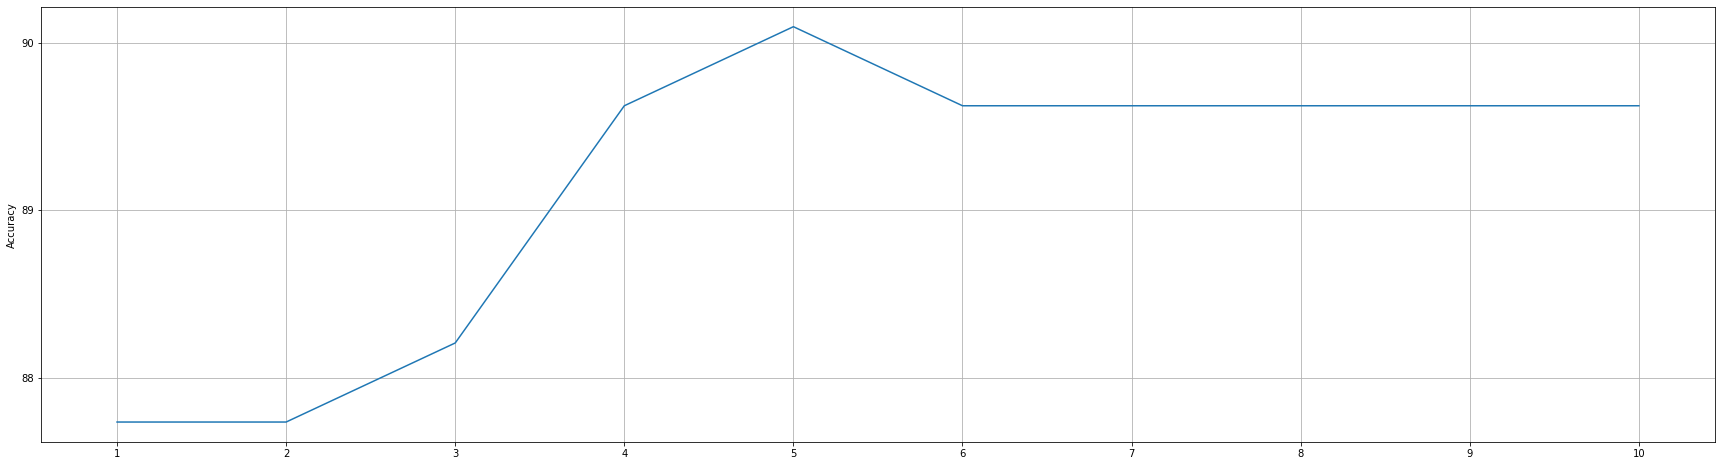

In [242]:
scores=[]
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 4
degree= 5
degree= 6
Polynomial  90.09433962264151

 [[185   1]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.83      0.19      0.31        26

    accuracy                           0.90       212
   macro avg       0.87      0.59      0.63       212
weighted avg       0.89      0.90      0.87       212



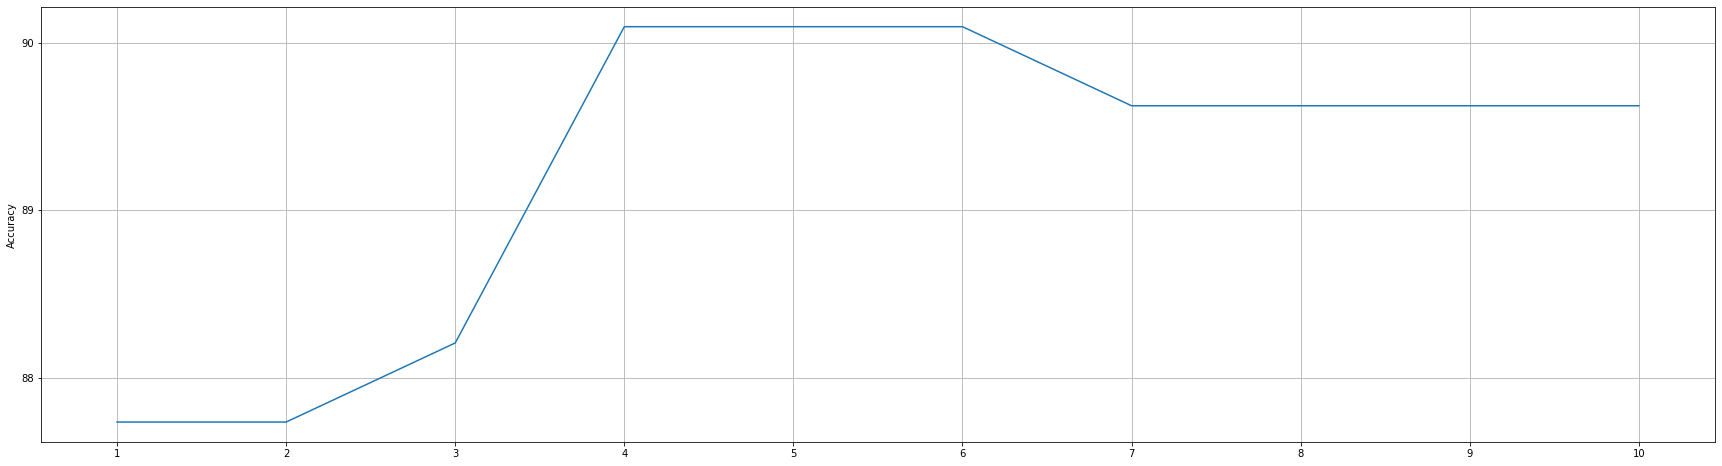

In [243]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 4
degree= 9
degree= 10
Polynomial  90.09433962264151

 [[184   2]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       186
           1       0.78      0.27      0.40        26

    accuracy                           0.90       212
   macro avg       0.84      0.63      0.67       212
weighted avg       0.89      0.90      0.88       212



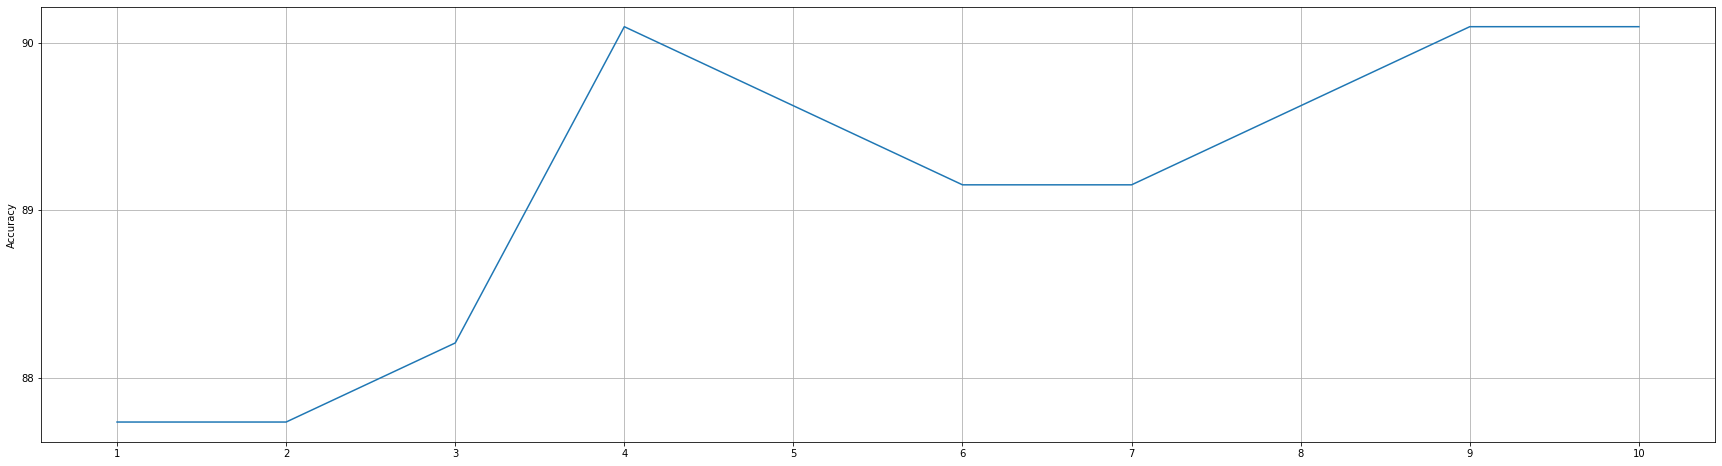

In [244]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 4
degree= 5
Polynomial  89.62264150943396

 [[182   4]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.60      0.23      0.33        26

    accuracy                           0.89       212
   macro avg       0.75      0.60      0.64       212
weighted avg       0.86      0.89      0.86       212



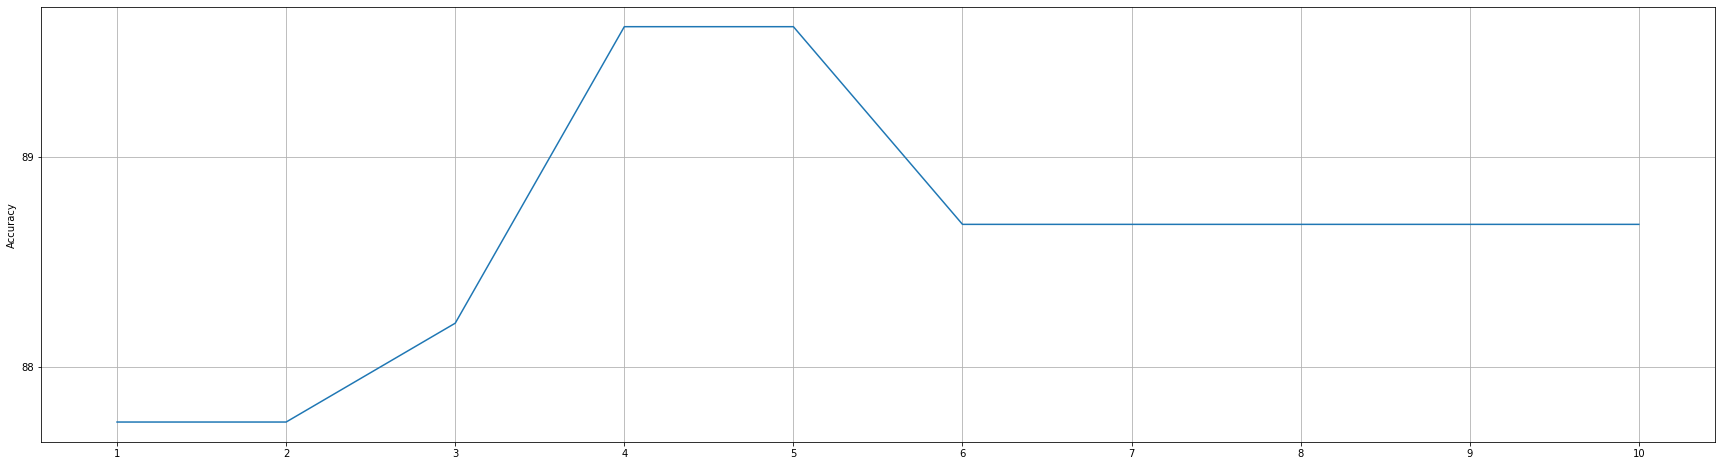

In [245]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 4
degree= 5
Polynomial  90.09433962264151

 [[182   4]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       186
           1       0.50      0.15      0.24        26

    accuracy                           0.88       212
   macro avg       0.70      0.57      0.58       212
weighted avg       0.84      0.88      0.85       212



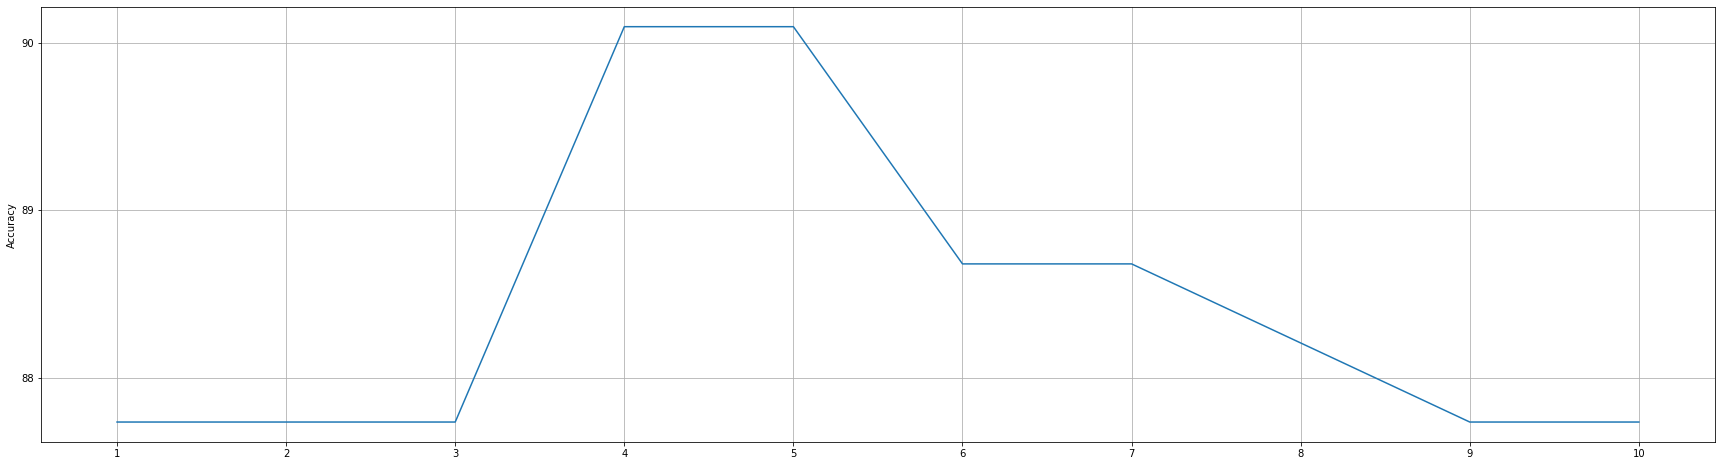

In [246]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 5
Polynomial  90.09433962264151

 [[183   3]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.62      0.19      0.29        26

    accuracy                           0.89       212
   macro avg       0.76      0.59      0.62       212
weighted avg       0.86      0.89      0.86       212



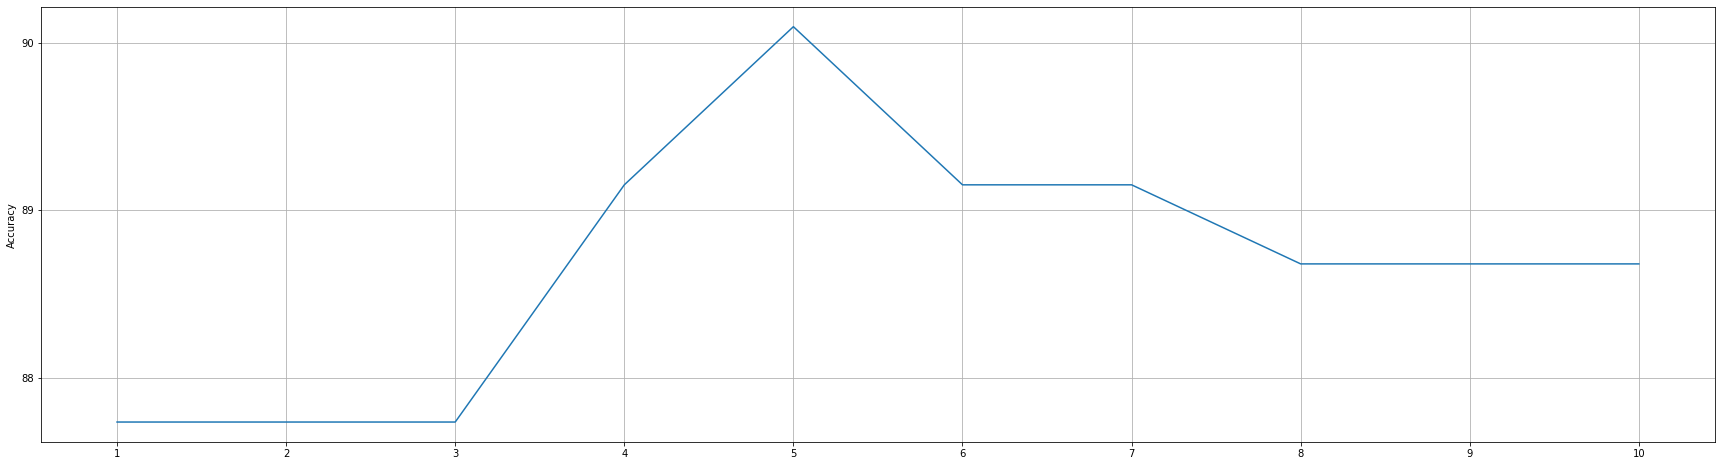

In [247]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 5
Polynomial  90.09433962264151

 [[184   2]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.75      0.23      0.35        26

    accuracy                           0.90       212
   macro avg       0.83      0.61      0.65       212
weighted avg       0.88      0.90      0.87       212



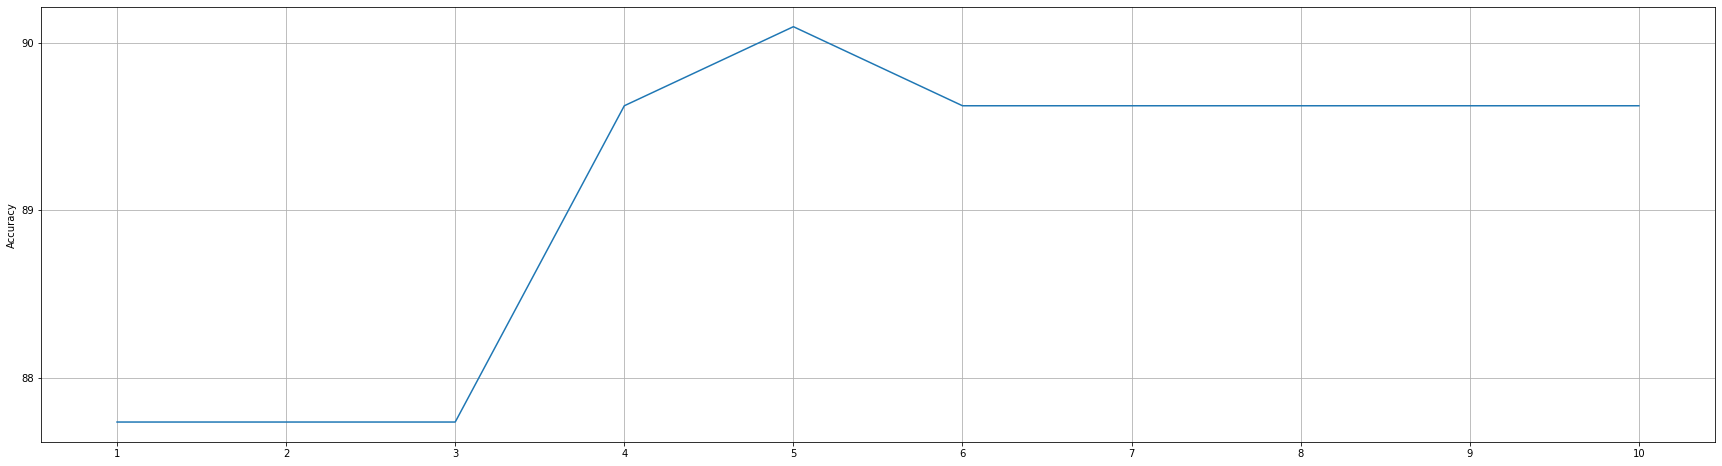

In [248]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 7
Polynomial  89.62264150943396

 [[184   2]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       186
           1       0.67      0.15      0.25        26

    accuracy                           0.89       212
   macro avg       0.78      0.57      0.59       212
weighted avg       0.87      0.89      0.85       212



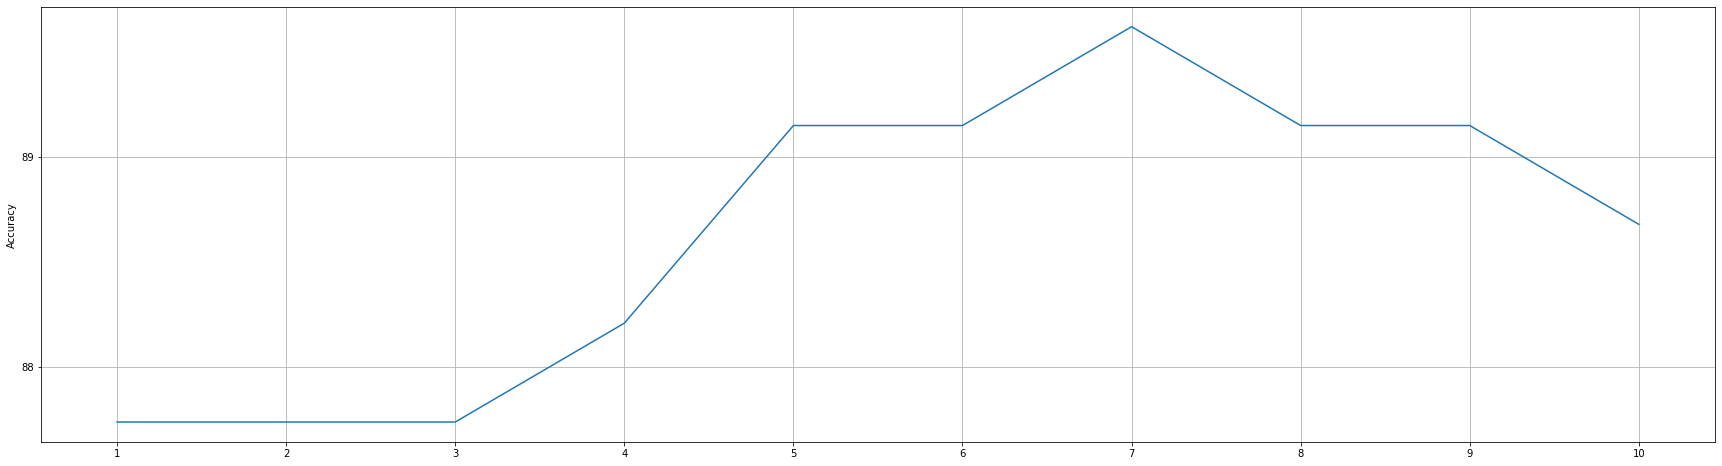

In [249]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.15094339622641
degree= 3
degree= 4
Polynomial  89.15094339622641

 [[180   6]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       186
           1       0.40      0.15      0.22        26

    accuracy                           0.87       212
   macro avg       0.65      0.56      0.58       212
weighted avg       0.83      0.87      0.84       212



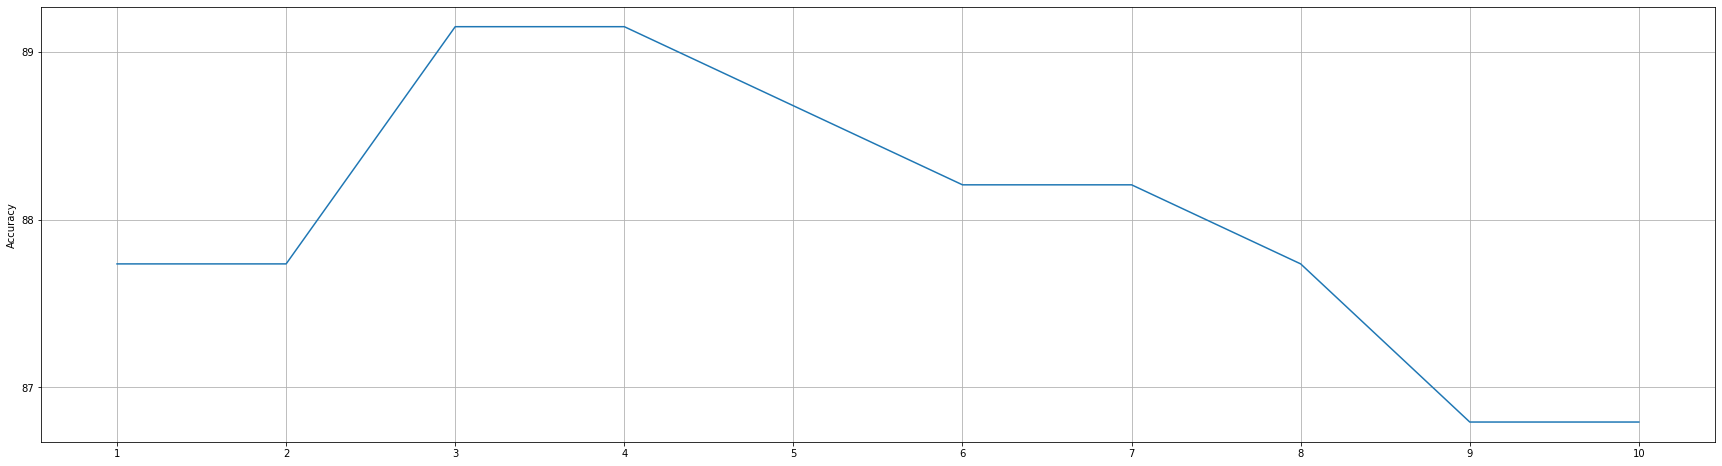

In [250]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.15094339622641
degree= 4
degree= 5
Polynomial  89.15094339622641

 [[182   4]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       186
           1       0.50      0.15      0.24        26

    accuracy                           0.88       212
   macro avg       0.70      0.57      0.58       212
weighted avg       0.84      0.88      0.85       212



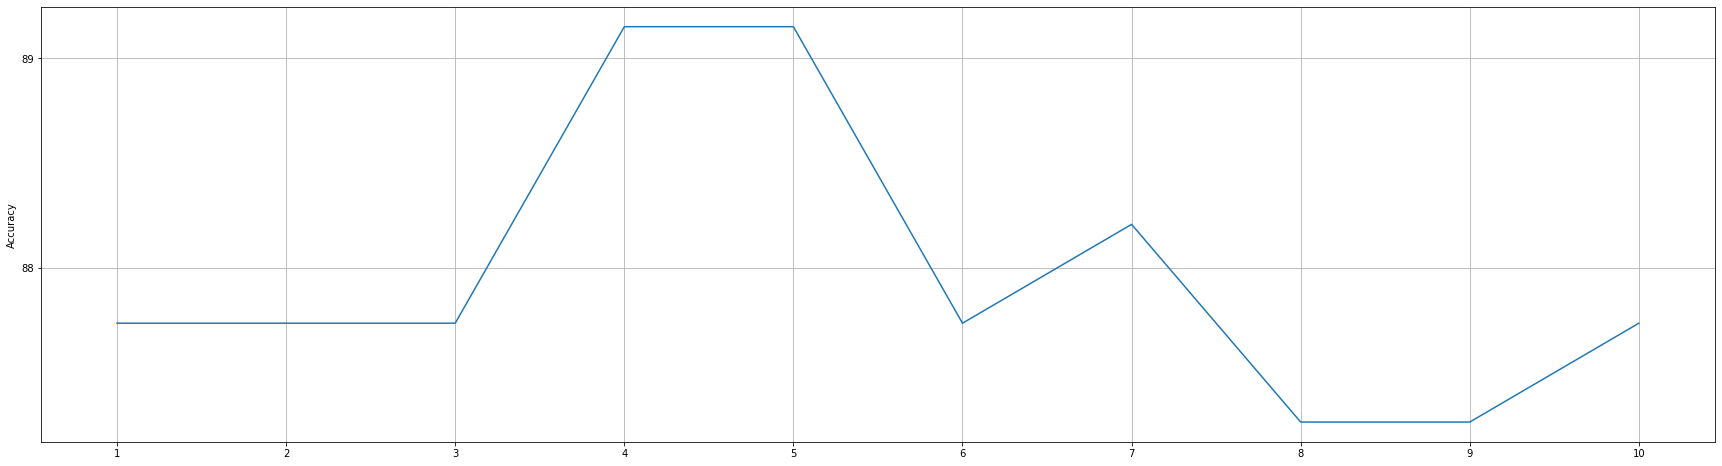

In [251]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 6
degree= 8
Polynomial  90.09433962264151

 [[182   4]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.60      0.23      0.33        26

    accuracy                           0.89       212
   macro avg       0.75      0.60      0.64       212
weighted avg       0.86      0.89      0.86       212



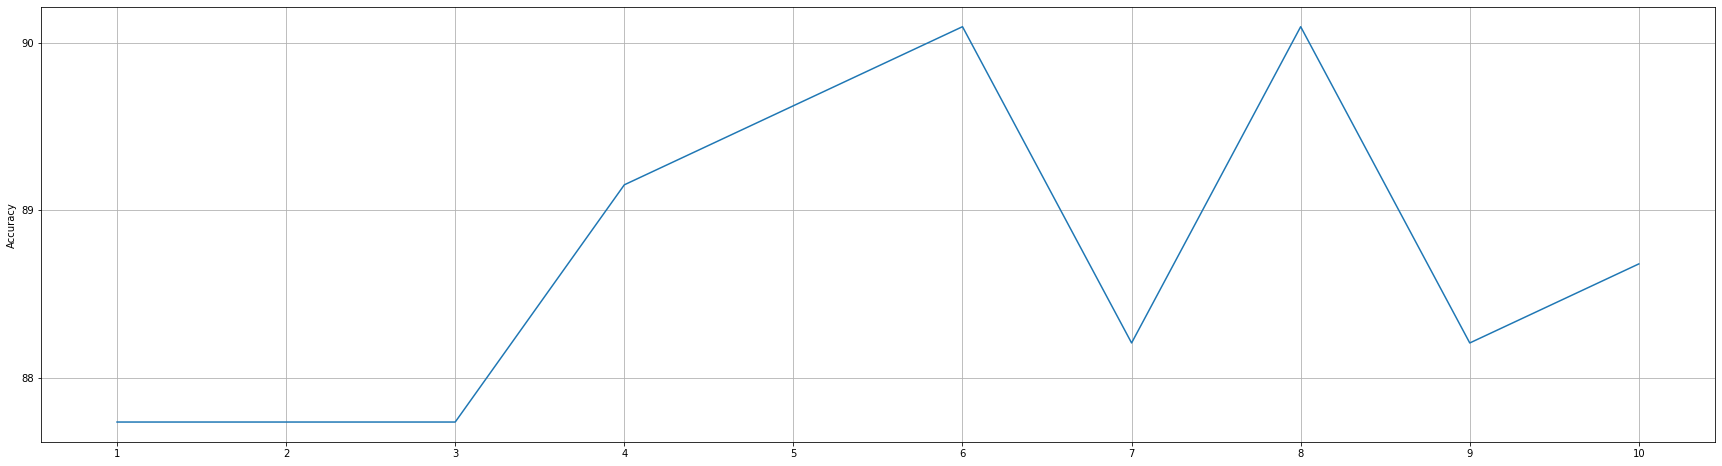

In [252]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 5
Polynomial  90.09433962264151

 [[184   2]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.71      0.19      0.30        26

    accuracy                           0.89       212
   macro avg       0.81      0.59      0.62       212
weighted avg       0.88      0.89      0.86       212



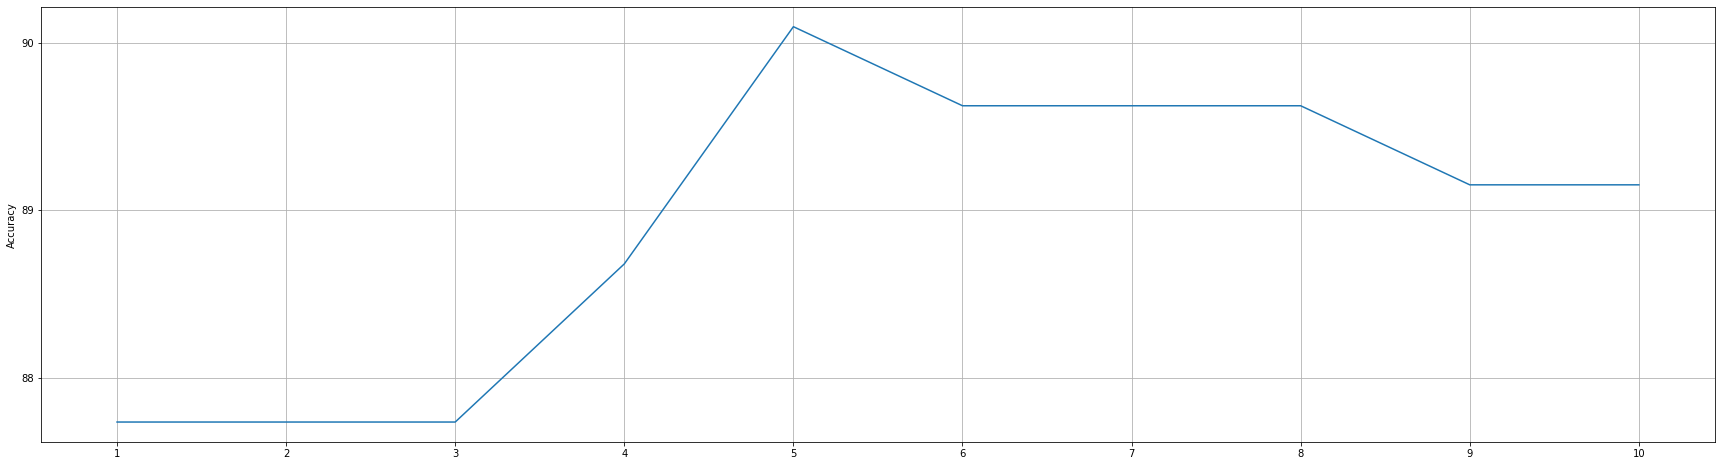

In [253]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
degree= 7
degree= 8
degree= 9
Polynomial  87.73584905660378

 [[183   3]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       186
           1       0.00      0.00      0.00        26

    accuracy                           0.86       212
   macro avg       0.44      0.49      0.46       212
weighted avg       0.77      0.86      0.81       212



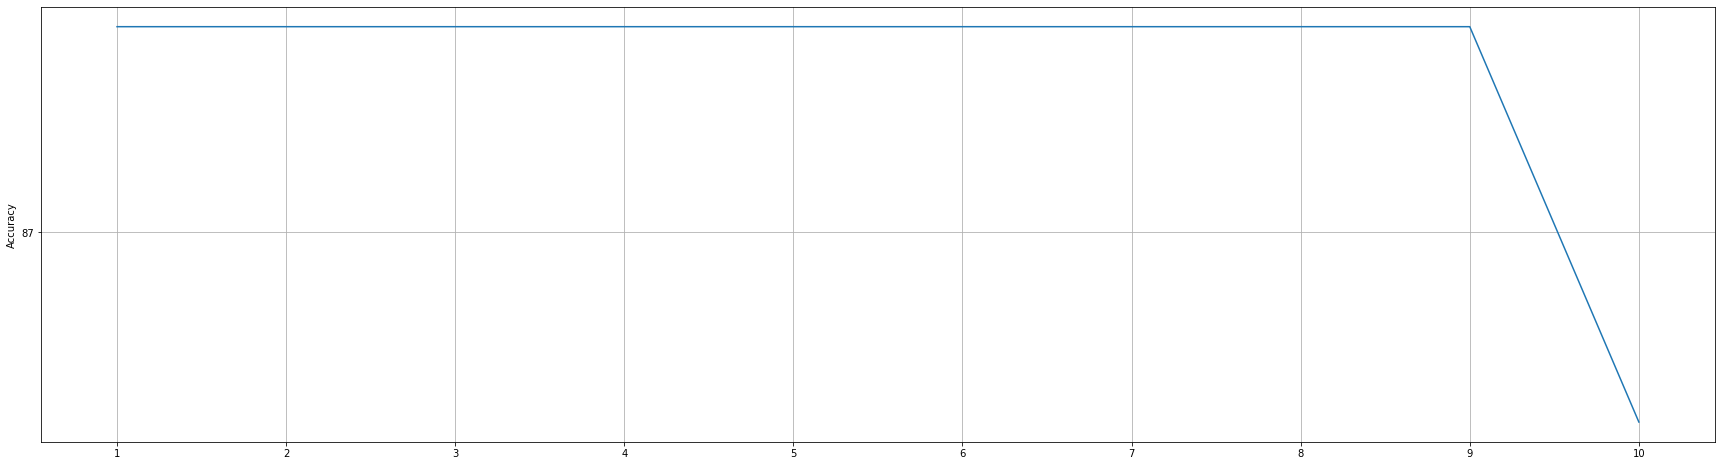

In [254]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
Polynomial  87.73584905660378

 [[171  15]
 [ 25   1]] 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       186
           1       0.06      0.04      0.05        26

    accuracy                           0.81       212
   macro avg       0.47      0.48      0.47       212
weighted avg       0.77      0.81      0.79       212



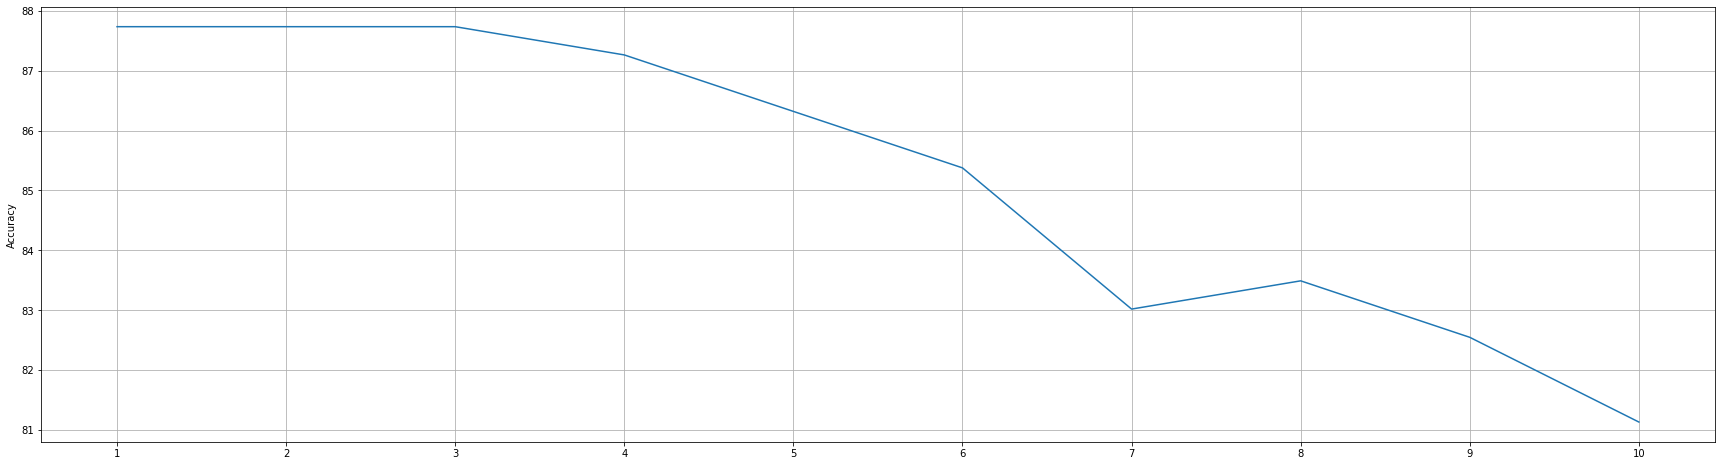

In [255]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

88.20754716981132
degree= 5
degree= 6
degree= 7
Polynomial  88.20754716981132

 [[181   5]
 [ 23   3]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       186
           1       0.38      0.12      0.18        26

    accuracy                           0.87       212
   macro avg       0.63      0.54      0.55       212
weighted avg       0.82      0.87      0.84       212



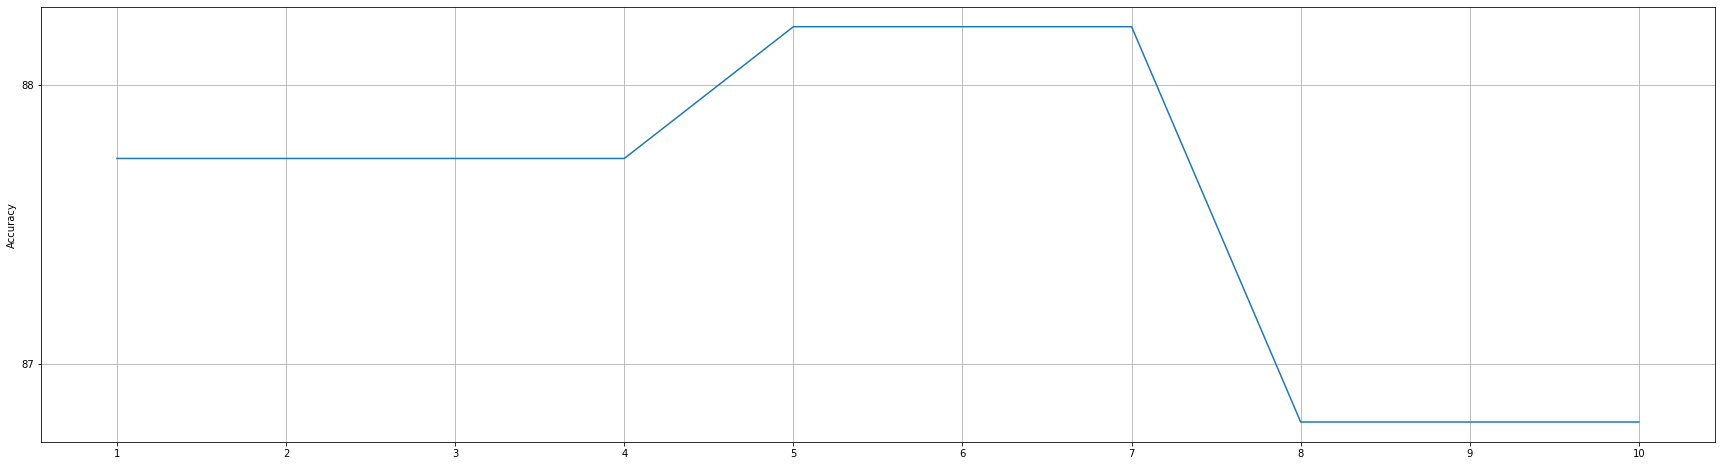

In [256]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
Polynomial  87.73584905660378

 [[182   4]
 [ 24   2]] 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       186
           1       0.33      0.08      0.12        26

    accuracy                           0.87       212
   macro avg       0.61      0.53      0.53       212
weighted avg       0.82      0.87      0.83       212



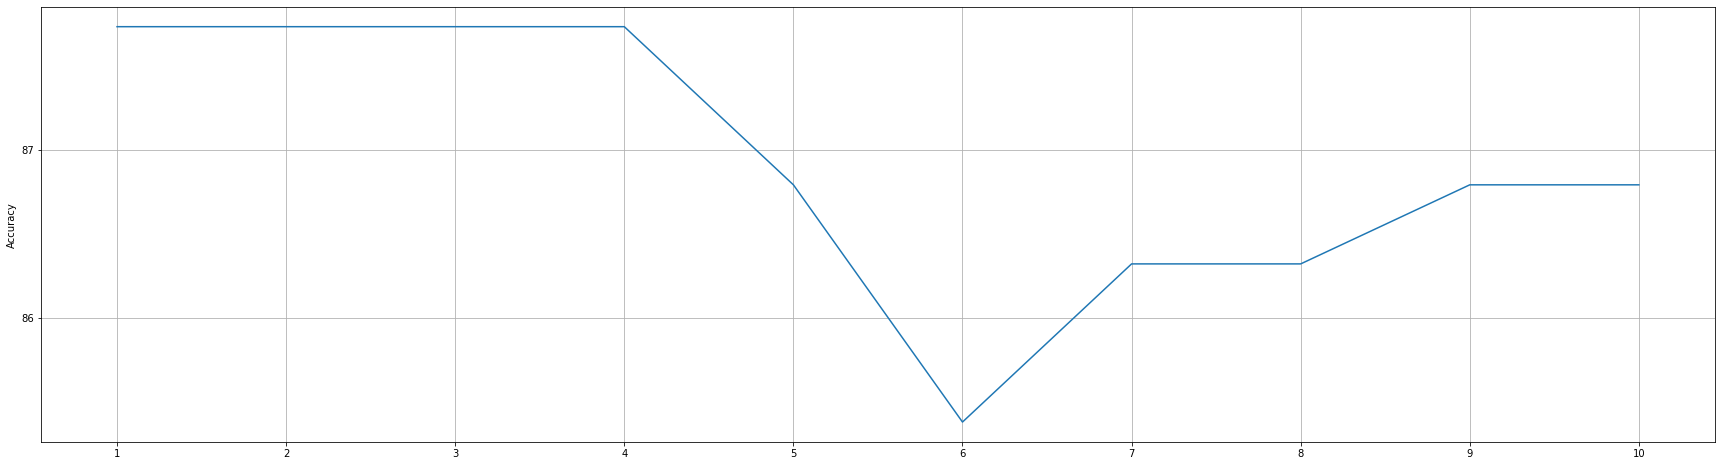

In [257]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
Polynomial  87.73584905660378

 [[169  17]
 [ 23   3]] 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       186
           1       0.15      0.12      0.13        26

    accuracy                           0.81       212
   macro avg       0.52      0.51      0.51       212
weighted avg       0.79      0.81      0.80       212



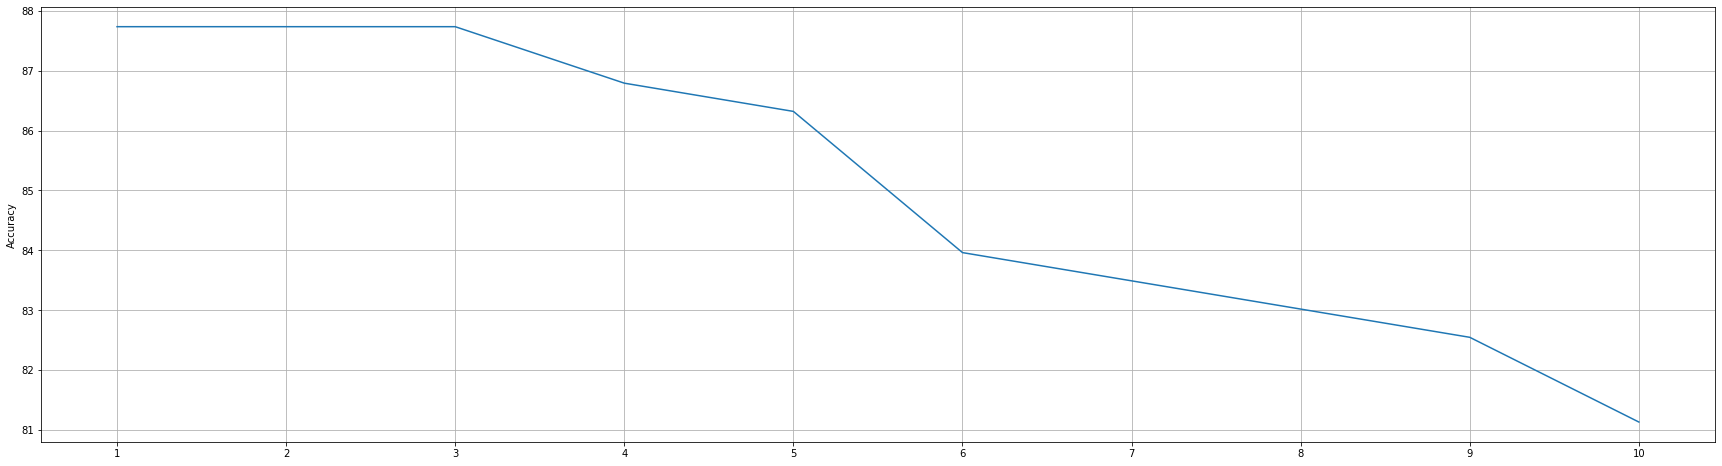

In [258]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
Polynomial  87.73584905660378

 [[182   4]
 [ 23   3]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       186
           1       0.43      0.12      0.18        26

    accuracy                           0.87       212
   macro avg       0.66      0.55      0.56       212
weighted avg       0.83      0.87      0.84       212



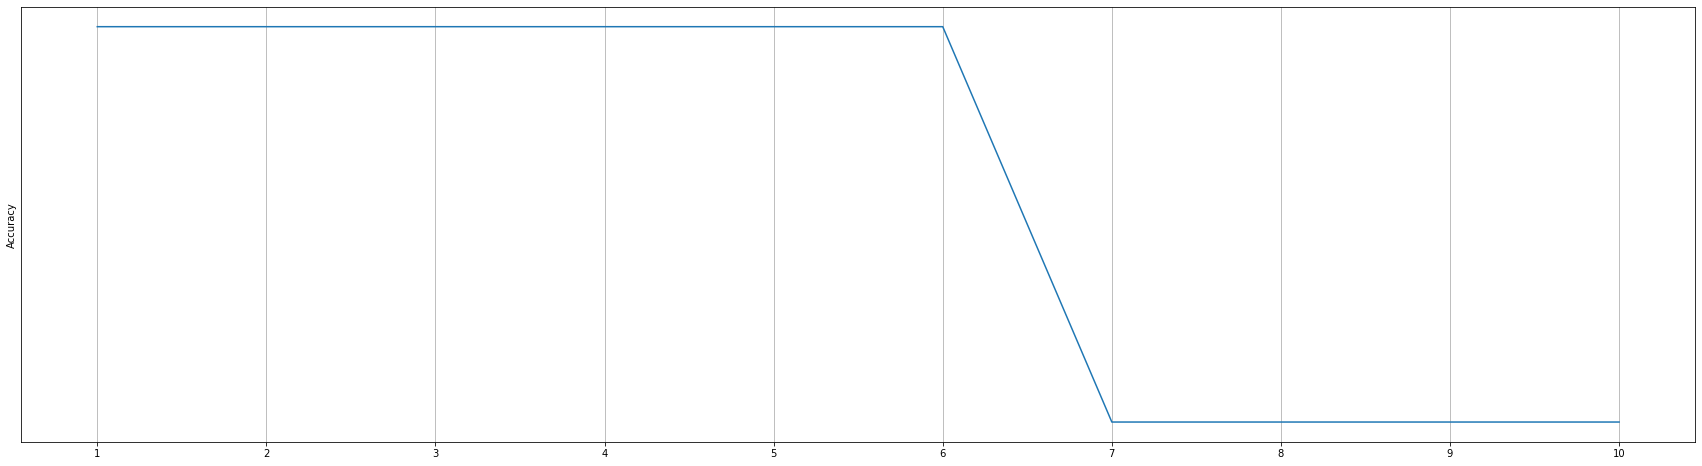

In [259]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
Polynomial  87.73584905660378

 [[183   3]
 [ 25   1]] 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       186
           1       0.25      0.04      0.07        26

    accuracy                           0.87       212
   macro avg       0.56      0.51      0.50       212
weighted avg       0.80      0.87      0.82       212



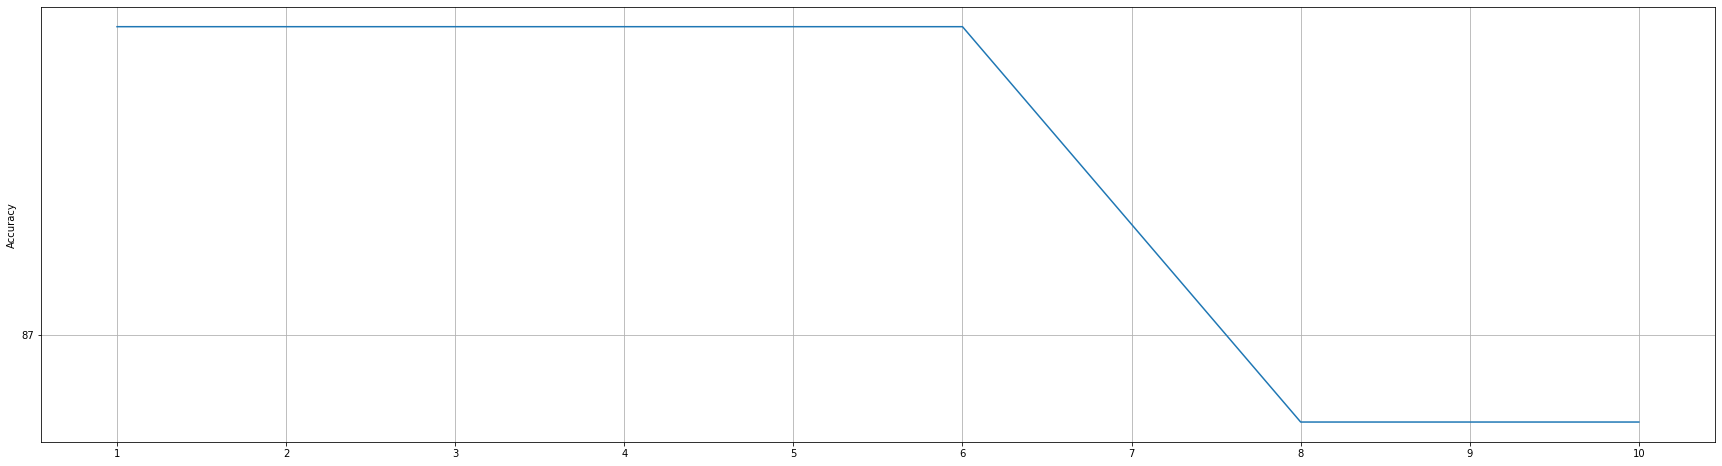

In [260]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
degree= 7
degree= 8
degree= 9
degree= 10
Polynomial  87.73584905660378

 [[186   0]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       186
           1       0.00      0.00      0.00        26

    accuracy                           0.88       212
   macro avg       0.44      0.50      0.47       212
weighted avg       0.77      0.88      0.82       212



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


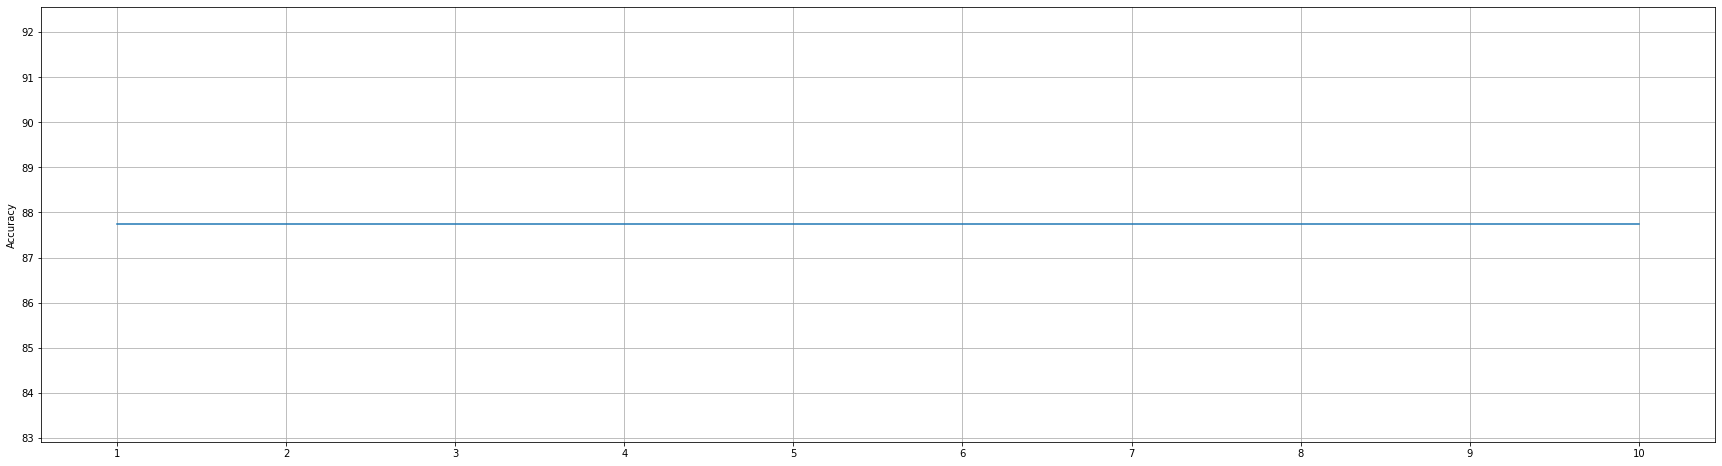

In [261]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 3
degree= 4
Polynomial  90.09433962264151

 [[183   3]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.62      0.19      0.29        26

    accuracy                           0.89       212
   macro avg       0.76      0.59      0.62       212
weighted avg       0.86      0.89      0.86       212



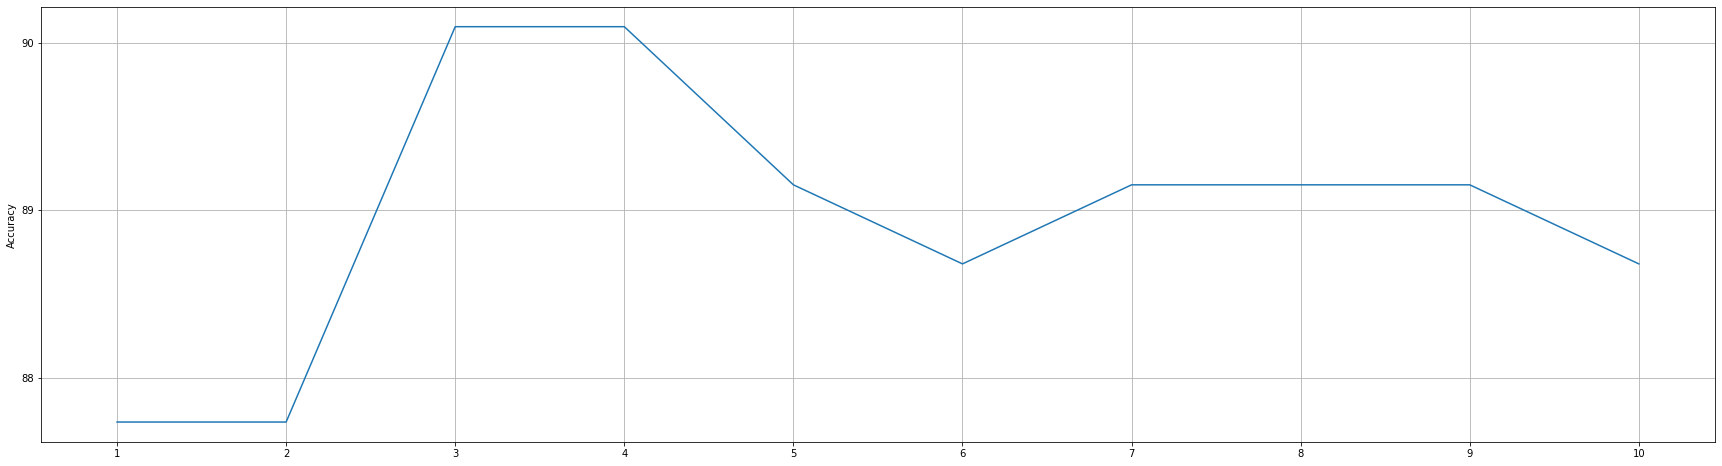

In [262]:
A=df
X=A.drop('vital.status',axis=1)
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))